In [1]:
from mcbj import *
from pca_and_ml import *
from noise import *
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter
import re
import pandas as pd
import plots

date = "21_05_21"
sample_rate = 50_000
# home_folder = Path(f"D:/BJ_Data/{date}")
home_folder = Path(f'//DATACENTER/BreakJunction_group/BJ_Data/{date}')

# Histogram of traces 1-200 -- Clean gold

In [2]:
hist_gold = Histogram(folder=home_folder,
                      start_trace=1, end_trace=200,
                      conductance_range=(1e-5, 10),
                      conductance_log_scale=True,
                      conductance_bins_num=100,
                      conductance_bins_mode='total')

In [3]:
hist_gold.calc_stats(align_at=0.5,
                     range_pull=(-1, 1),
                     range_push=(-0.5, 1.5))

  0%|          | 0/200 [00:00<?, ?it/s]

Pull 2D histogram created from 200 traces
Push 2D histogram created from 200 traces


<AxesSubplot:xlabel='Conductance $[G_{0}]$', ylabel='Normalized counts [a.u.]'>

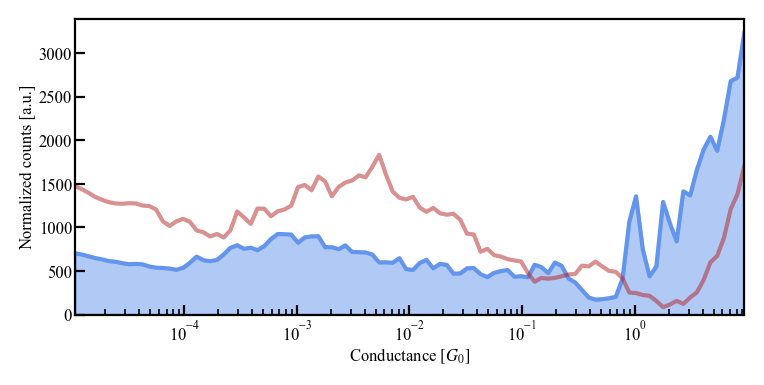

In [4]:
hist_gold.plot_hist_1d(dpi=200)

# Histogram of traces after evaporation without hold measurement

In [5]:
after_evap_no_hold = np.hstack((np.arange(201, 1601, 1),
                                np.arange(5734, 7002, 1),
                                np.arange(12649, 14401, 1),
                                np.arange(23318, 25201, 1),
                                np.arange(27745, 32001, 1),
                                np.arange(36867, 38553, 1),
                                np.arange(43223, 43601, 1)
                               ))

In [6]:
after_evap_no_hold.shape

(12623,)

In [7]:
hist_BPY = Histogram(folder=home_folder,
                     traces=after_evap_no_hold,
                     conductance_range=(1e-5, 10),
                     conductance_log_scale=True,
                     conductance_bins_num=100,
                     conductance_bins_mode='total')

In [8]:
hist_BPY.calc_stats(align_at=0.5,
                    range_pull=(-1, 1),
                    range_push=(-0.5, 1.5))

  0%|          | 0/12623 [00:00<?, ?it/s]

Pull 2D histogram created from 12623 traces
Push 2D histogram created from 12623 traces


(0.0, 1600.0)

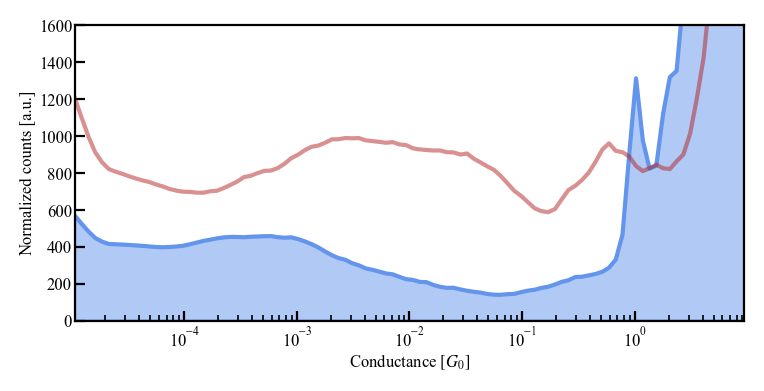

In [9]:
ax_hist_BPY = hist_BPY.plot_hist_1d(dpi=200)
ax_hist_BPY.set_ylim(0, 1600)

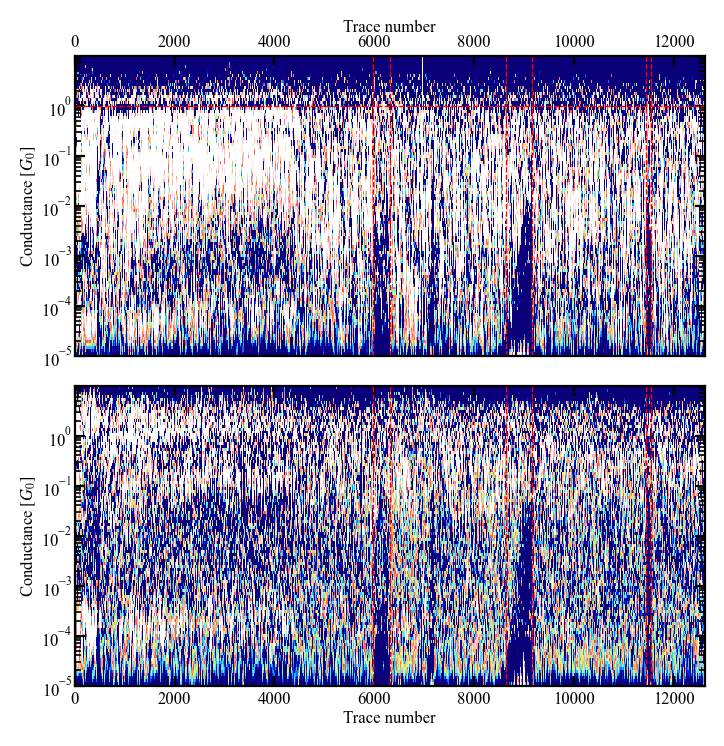

In [10]:
ax_temp_pull, ax_temp_push = hist_BPY.plot_temporal_hist(vmax_pull=500, vmax_push=1000, dpi=200)
ax_temp_pull.axhline(1, ls='--', lw=0.5, c='r')
ax_temp_pull.axvline(5980, ls='--', lw=0.5, c='r')
ax_temp_push.axvline(5980, ls='--', lw=0.5, c='r')

ax_temp_pull.axvline(6320, ls='--', lw=0.5, c='r')
ax_temp_push.axvline(6320, ls='--', lw=0.5, c='r')

ax_temp_pull.axvline(8630, ls='--', lw=0.5, c='r')
ax_temp_push.axvline(8630, ls='--', lw=0.5, c='r')

ax_temp_pull.axvline(9170, ls='--', lw=0.5, c='r')
ax_temp_push.axvline(9170, ls='--', lw=0.5, c='r')

ax_temp_pull.axvline(11440, ls='--', lw=0.5, c='r')
ax_temp_push.axvline(11440, ls='--', lw=0.5, c='r')

ax_temp_pull.axvline(11550, ls='--', lw=0.5, c='r')
ax_temp_push.axvline(11550, ls='--', lw=0.5, c='r')

# ax_temp_pull.set_xlim(11400, 11600)
# ax_temp_push.set_xlim(11400, 11600)

## Without the highlighted intervals
The temporal histogram here is not made from continous traces, but rather intervals between hold measurments.

However, it shows the intervals where the conductance traces are irregular, so I remove them from the analysis.

In [11]:
selected_inds = np.ones_like(hist_BPY.traces, dtype=bool)
selected_inds[5980:6320] = False
selected_inds[8630:9170] = False
selected_inds[11440:11550] = False
hist_BPY_selected = hist_BPY.traces[selected_inds]

In [12]:
hist_BPY = Histogram(folder=home_folder,
                     traces=hist_BPY_selected,
                     conductance_range=(1e-5, 10),
                     conductance_log_scale=True,
                     conductance_bins_num=100,
                     conductance_bins_mode='total')

In [13]:
hist_BPY.calc_stats(align_at=0.5,
                    range_pull=(-1, 1),
                    range_push=(-0.5, 1.5))

  0%|          | 0/11633 [00:00<?, ?it/s]

Pull 2D histogram created from 11633 traces
Push 2D histogram created from 11633 traces


(0.0, 1600.0)

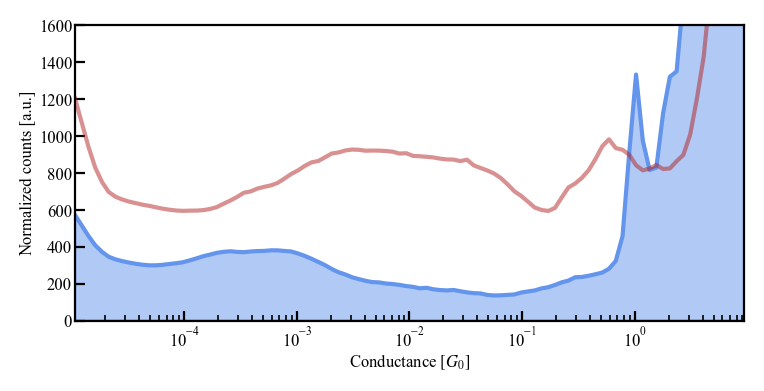

In [14]:
ax_hist_BPY = hist_BPY.plot_hist_1d(dpi=200)
ax_hist_BPY.set_ylim(0, 1600)

In [15]:
hist_BPY.calc_corr_hist_2d()

  0%|          | 0/11633 [00:00<?, ?it/s]

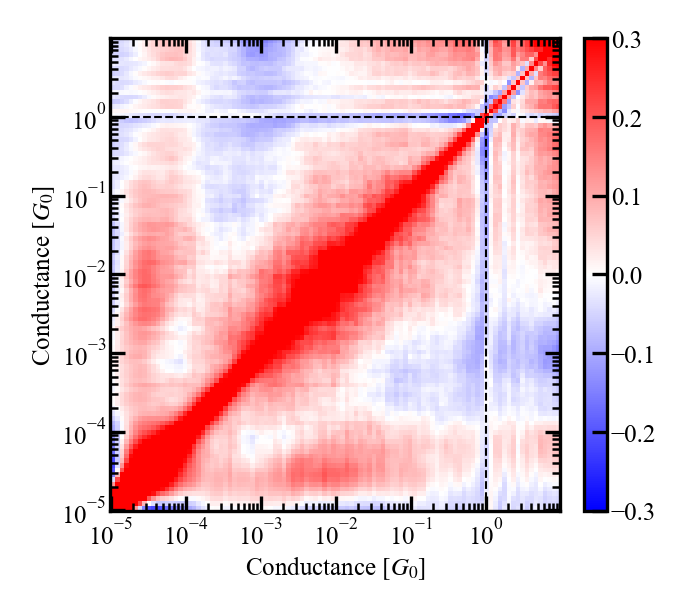

In [16]:
ax_corr, ax_cbar = hist_BPY.plot_corr(mode='pull', dpi=300, vmin=-0.3, vmax=0.3)
ax_corr.axhline(1, ls='--', lw=0.5, c='k')
ax_corr.axvline(1, ls='--', lw=0.5, c='k')

In [133]:
hist_BPY.save_histogram(fname=home_folder.joinpath('results/hist_BPY.h5'))

Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\results\hist_BPY.h5.


In [17]:
pc_BPY = PCA(hist=hist_BPY, num_of_pcs=5)
pc_BPY.calc_principal_components(direction='pull')

pc_BPY.project_to_pcs()
pc_BPY.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc_BPY.select_percentage(percentage=20, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

(1e-05, 10.01)

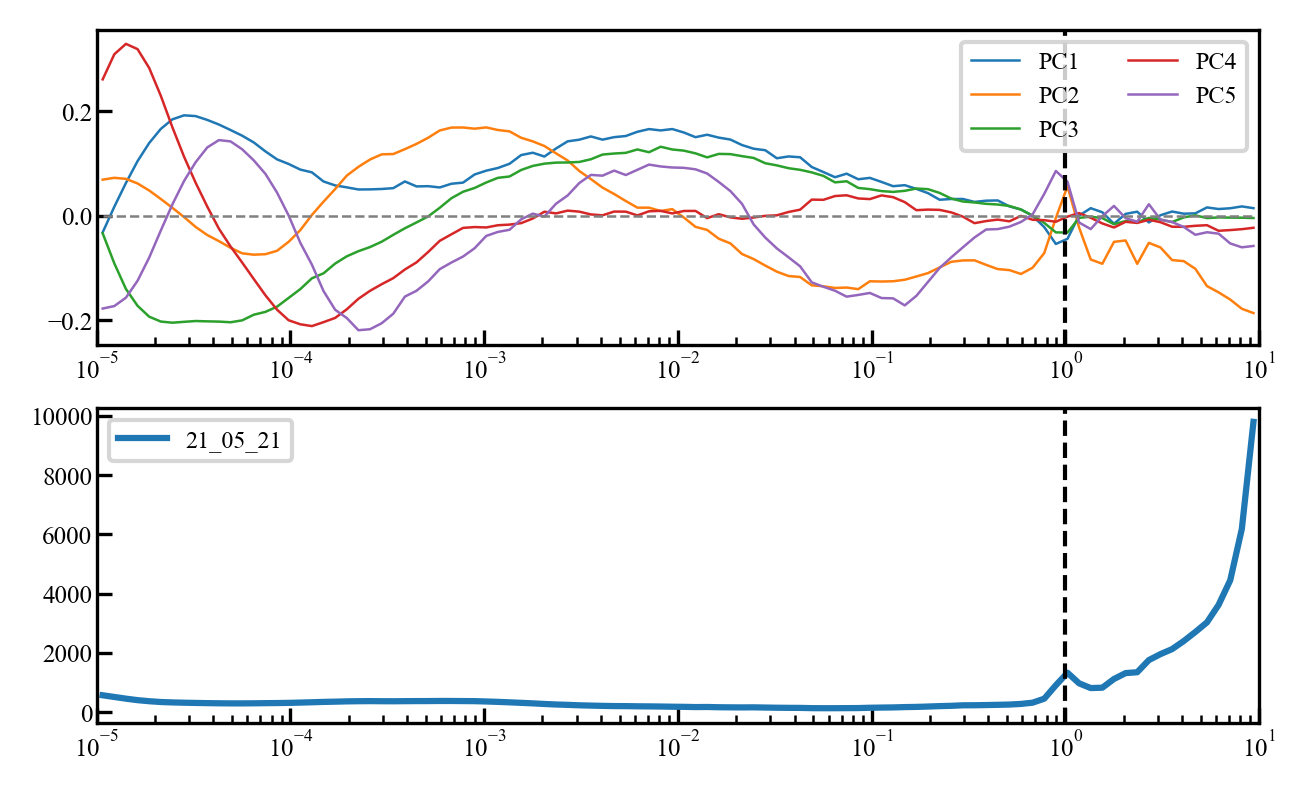

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc_BPY.plot_pcs(ax=ax1)
ax1.set_xscale('log')
ax2.plot(hist_BPY.hist_1d_bins, hist_BPY.hist_1d_pull, label='21_05_21')
ax2.set_xscale('log')
ax1.axvline(1, ls='--', lw=1, c='k')
ax2.axvline(1, ls='--', lw=1, c='k')
ax2.legend(fontsize='xx-small')
ax1.set_xlim(1e-5, 10.01)
ax2.set_xlim(1e-5, 10.01)

In [20]:
pc_BPY.calc_group_histograms()

Calculating 1D and 2D histograms of PC1 group1.


  0%|          | 0/2326 [00:00<?, ?it/s]

  0%|          | 0/2326 [00:00<?, ?it/s]

2D histogram pull direction created from 2326 traces
2D histogram push direction created from 2326 traces
Calculating 1D and 2D histograms of PC1 group2.


  0%|          | 0/2326 [00:00<?, ?it/s]

  0%|          | 0/2326 [00:00<?, ?it/s]

2D histogram pull direction created from 2326 traces
2D histogram push direction created from 2326 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/2326 [00:00<?, ?it/s]

  0%|          | 0/2326 [00:00<?, ?it/s]

2D histogram pull direction created from 2326 traces
2D histogram push direction created from 2326 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/2326 [00:00<?, ?it/s]

  0%|          | 0/2326 [00:00<?, ?it/s]

2D histogram pull direction created from 2326 traces
2D histogram push direction created from 2326 traces
Calculating 1D and 2D histograms of PC3 group1.


  0%|          | 0/2326 [00:00<?, ?it/s]

  0%|          | 0/2326 [00:00<?, ?it/s]

2D histogram pull direction created from 2326 traces
2D histogram push direction created from 2326 traces
Calculating 1D and 2D histograms of PC3 group2.


  0%|          | 0/2326 [00:00<?, ?it/s]

  0%|          | 0/2326 [00:00<?, ?it/s]

2D histogram pull direction created from 2326 traces
2D histogram push direction created from 2326 traces
Calculating 1D and 2D histograms of PC4 group1.


  0%|          | 0/2326 [00:00<?, ?it/s]

  0%|          | 0/2326 [00:00<?, ?it/s]

2D histogram pull direction created from 2326 traces
2D histogram push direction created from 2326 traces
Calculating 1D and 2D histograms of PC4 group2.


  0%|          | 0/2326 [00:00<?, ?it/s]

  0%|          | 0/2326 [00:00<?, ?it/s]

2D histogram pull direction created from 2326 traces
2D histogram push direction created from 2326 traces
Calculating 1D and 2D histograms of PC5 group1.


  0%|          | 0/2326 [00:00<?, ?it/s]

  0%|          | 0/2326 [00:00<?, ?it/s]

2D histogram pull direction created from 2326 traces
2D histogram push direction created from 2326 traces
Calculating 1D and 2D histograms of PC5 group2.


  0%|          | 0/2326 [00:00<?, ?it/s]

  0%|          | 0/2326 [00:00<?, ?it/s]

2D histogram pull direction created from 2326 traces
2D histogram push direction created from 2326 traces


In [134]:
pc_BPY.save_principal_components(fname=home_folder.joinpath('results/pc_BPY.h5'), save_trace_hists=True)

Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_total_for_pc_BPY.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_PC1.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group2_for_pc_BPY_PC1.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_PC2.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group2_for_pc_BPY_PC2.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_PC3.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group2_for_pc_BPY_PC3.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_PC4.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group

array([<AxesSubplot:title={'center':'PC1'}>,
       <AxesSubplot:title={'center':'PC2'}>,
       <AxesSubplot:title={'center':'PC3'}>,
       <AxesSubplot:title={'center':'PC4'}>,
       <AxesSubplot:title={'center':'PC5'}>], dtype=object)

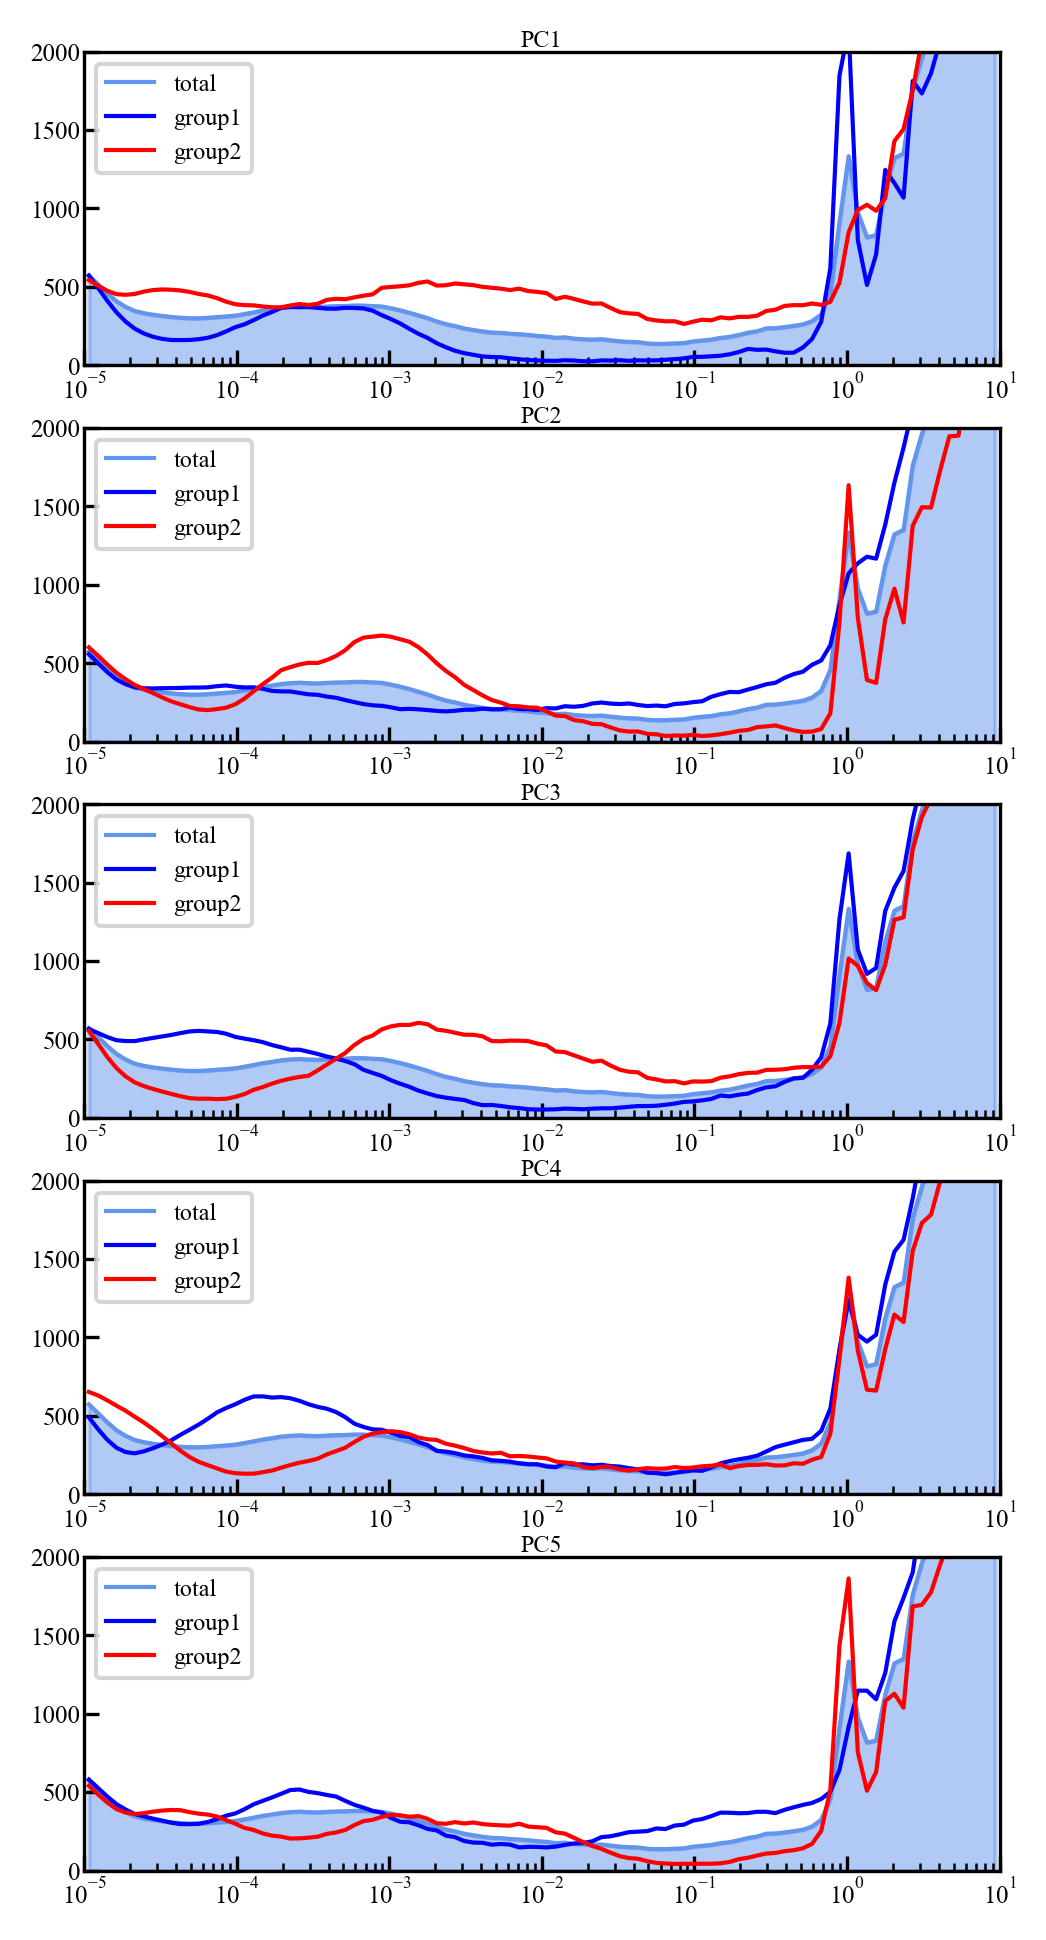

In [21]:
pc_BPY.plot_group_histograms_1d(ylims=(0, 2000))

In [ ]:
# pc_BPY.save_principal_components(fname='pc_BPY.h5', save_trace_hists=True)

PC2 seems to differentiate between molecular and clean traces.

# Histogram of traces after evaporation with hold measurement

In [22]:
after_evap_w_hold = np.hstack((np.arange(1632, 5733, 1),
                               np.arange(7002, 12648, 1),
                               np.arange(14401, 19575, 1),
                               np.arange(20046, 23317, 1),
                               np.arange(25201, 27744, 1),
                               np.arange(32001, 36866, 1),
                               np.arange(38553, 43222, 1)
                               ))

In [23]:
after_evap_w_hold.shape

(30269,)

In [24]:
hist_BPY_hold = Histogram(folder=home_folder,
                          traces=after_evap_w_hold,
                          conductance_range=(1e-5, 10),
                          conductance_log_scale=True,
                          conductance_bins_num=100,
                          conductance_bins_mode='total')

In [25]:
hist_BPY_hold.calc_stats(align_at=0.5,
                         range_pull=(-1, 1),
                         range_push=(-0.5, 1.5))

  0%|          | 0/30269 [00:00<?, ?it/s]

Pull 2D histogram created from 30269 traces
Push 2D histogram created from 30269 traces


(0.0, 3000.0)

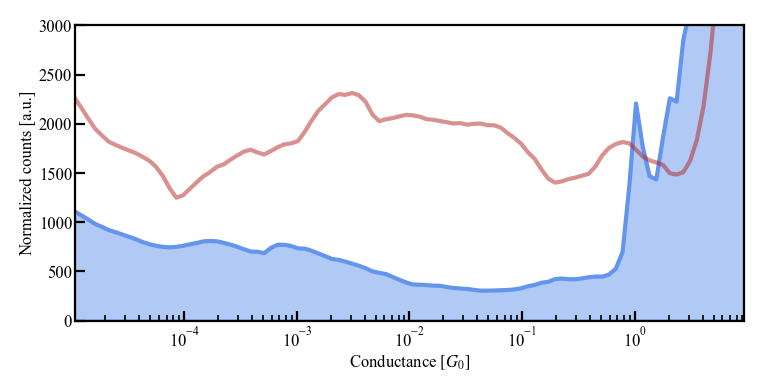

In [26]:
ax_hist_BPY_hold = hist_BPY_hold.plot_hist_1d(dpi=200)
ax_hist_BPY_hold.set_ylim(0, 3000)

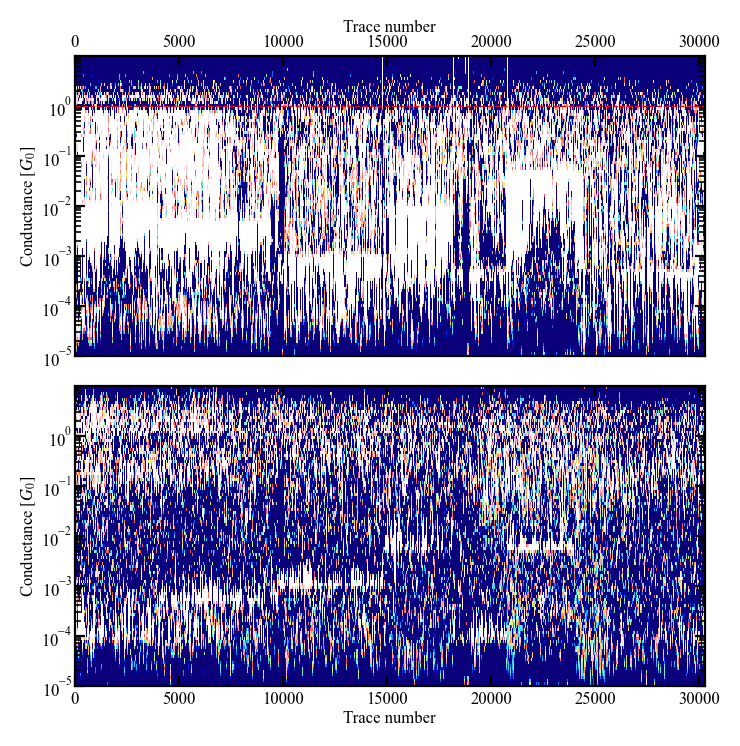

In [27]:
ax_temp_pull, ax_temp_push = hist_BPY_hold.plot_temporal_hist(vmax_pull=500, vmax_push=1000, dpi=200)
ax_temp_pull.axhline(1, ls='--', lw=0.5, c='r')
# ax_temp_pull.axvline(5980, ls='--', lw=0.5, c='r')
# ax_temp_push.axvline(5980, ls='--', lw=0.5, c='r')

# ax_temp_pull.axvline(6320, ls='--', lw=0.5, c='r')
# ax_temp_push.axvline(6320, ls='--', lw=0.5, c='r')

# ax_temp_pull.axvline(8630, ls='--', lw=0.5, c='r')
# ax_temp_push.axvline(8630, ls='--', lw=0.5, c='r')

# ax_temp_pull.axvline(9170, ls='--', lw=0.5, c='r')
# ax_temp_push.axvline(9170, ls='--', lw=0.5, c='r')

# ax_temp_pull.axvline(11440, ls='--', lw=0.5, c='r')
# ax_temp_push.axvline(11440, ls='--', lw=0.5, c='r')

# ax_temp_pull.axvline(11550, ls='--', lw=0.5, c='r')
# ax_temp_push.axvline(11550, ls='--', lw=0.5, c='r')

# ax_temp_pull.set_xlim(11400, 11600)
# ax_temp_push.set_xlim(11400, 11600)

In [28]:
hist_BPY_hold.calc_corr_hist_2d()

  0%|          | 0/30269 [00:00<?, ?it/s]

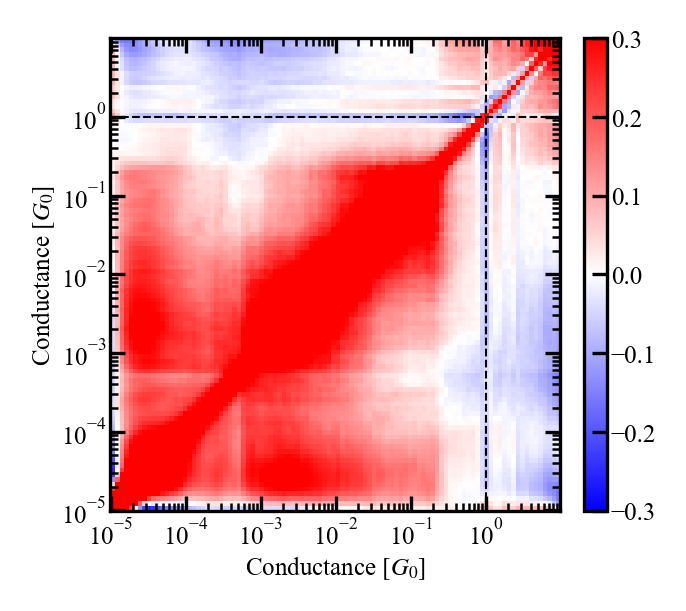

In [29]:
ax_corr, ax_cbar = hist_BPY_hold.plot_corr(mode='pull', dpi=300, vmin=-0.3, vmax=0.3)
ax_corr.axhline(1, ls='--', lw=0.5, c='k')
ax_corr.axvline(1, ls='--', lw=0.5, c='k')

In [132]:
hist_BPY_hold.save_histogram(fname=home_folder.joinpath('results/hist_BPY_hold.h5'))

Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\results\hist_BPY_hold.h5.


In [30]:
pc_BPY_hold = PCA(hist=hist_BPY_hold, num_of_pcs=5)
pc_BPY_hold.calc_principal_components(direction='pull')

pc_BPY_hold.project_to_pcs()
pc_BPY_hold.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc_BPY_hold.select_percentage(percentage=20, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

(1e-05, 10.01)

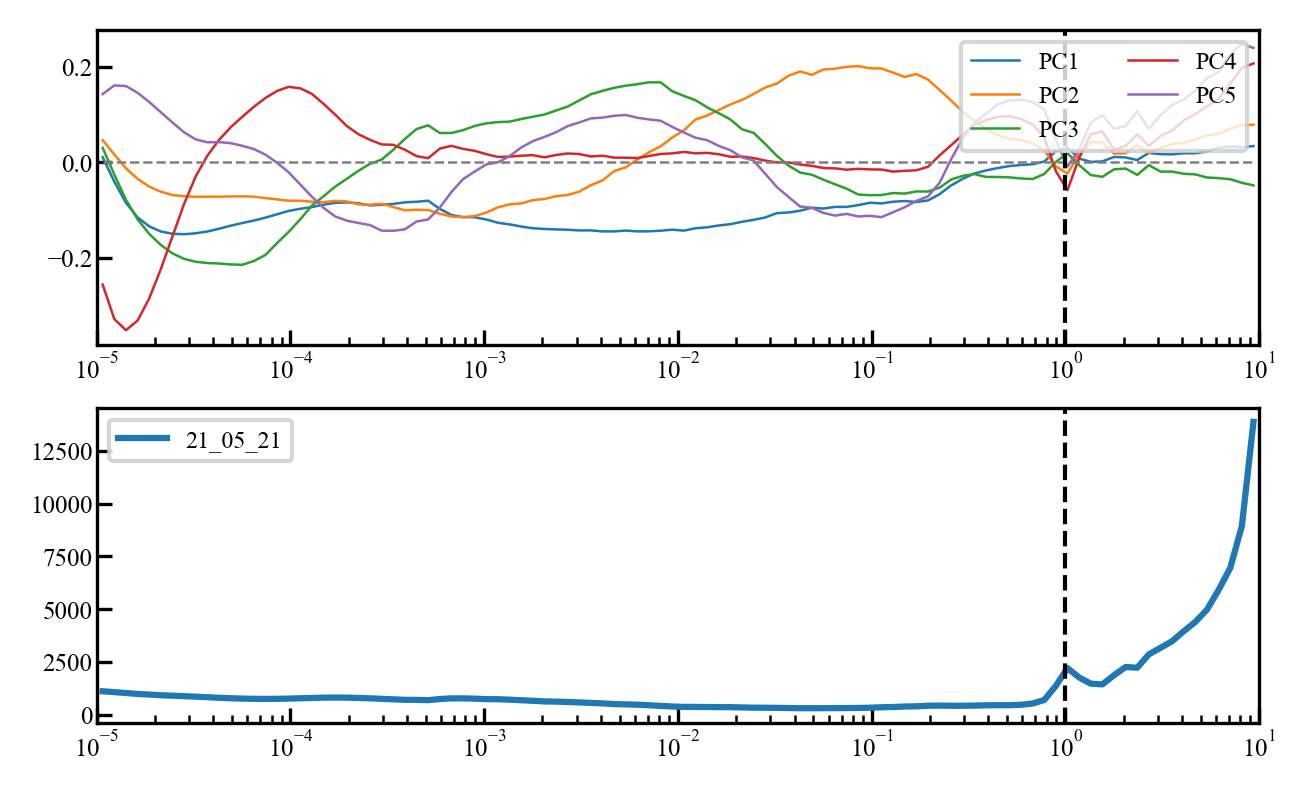

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc_BPY_hold.plot_pcs(ax=ax1)
ax1.set_xscale('log')
ax2.plot(hist_BPY_hold.hist_1d_bins, hist_BPY_hold.hist_1d_pull, label='21_05_21')
ax2.set_xscale('log')
ax1.axvline(1, ls='--', lw=1, c='k')
ax2.axvline(1, ls='--', lw=1, c='k')
ax2.legend(fontsize='xx-small')
ax1.set_xlim(1e-5, 10.01)
ax2.set_xlim(1e-5, 10.01)

In [32]:
pc_BPY_hold.calc_group_histograms()

Calculating 1D and 2D histograms of PC1 group1.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC1 group2.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC3 group1.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC3 group2.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC4 group1.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC4 group2.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC5 group1.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC5 group2.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces


In [135]:
pc_BPY_hold.save_principal_components(fname=home_folder.joinpath('results/pc_BPY_hold.h5'), save_trace_hists=True)

Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_total_for_pc_BPY_hold.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_hold_PC1.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group2_for_pc_BPY_hold_PC1.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_hold_PC2.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group2_for_pc_BPY_hold_PC2.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_hold_PC3.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group2_for_pc_BPY_hold_PC3.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_hold_PC4.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\B

array([<AxesSubplot:title={'center':'PC1'}>,
       <AxesSubplot:title={'center':'PC2'}>,
       <AxesSubplot:title={'center':'PC3'}>,
       <AxesSubplot:title={'center':'PC4'}>,
       <AxesSubplot:title={'center':'PC5'}>], dtype=object)

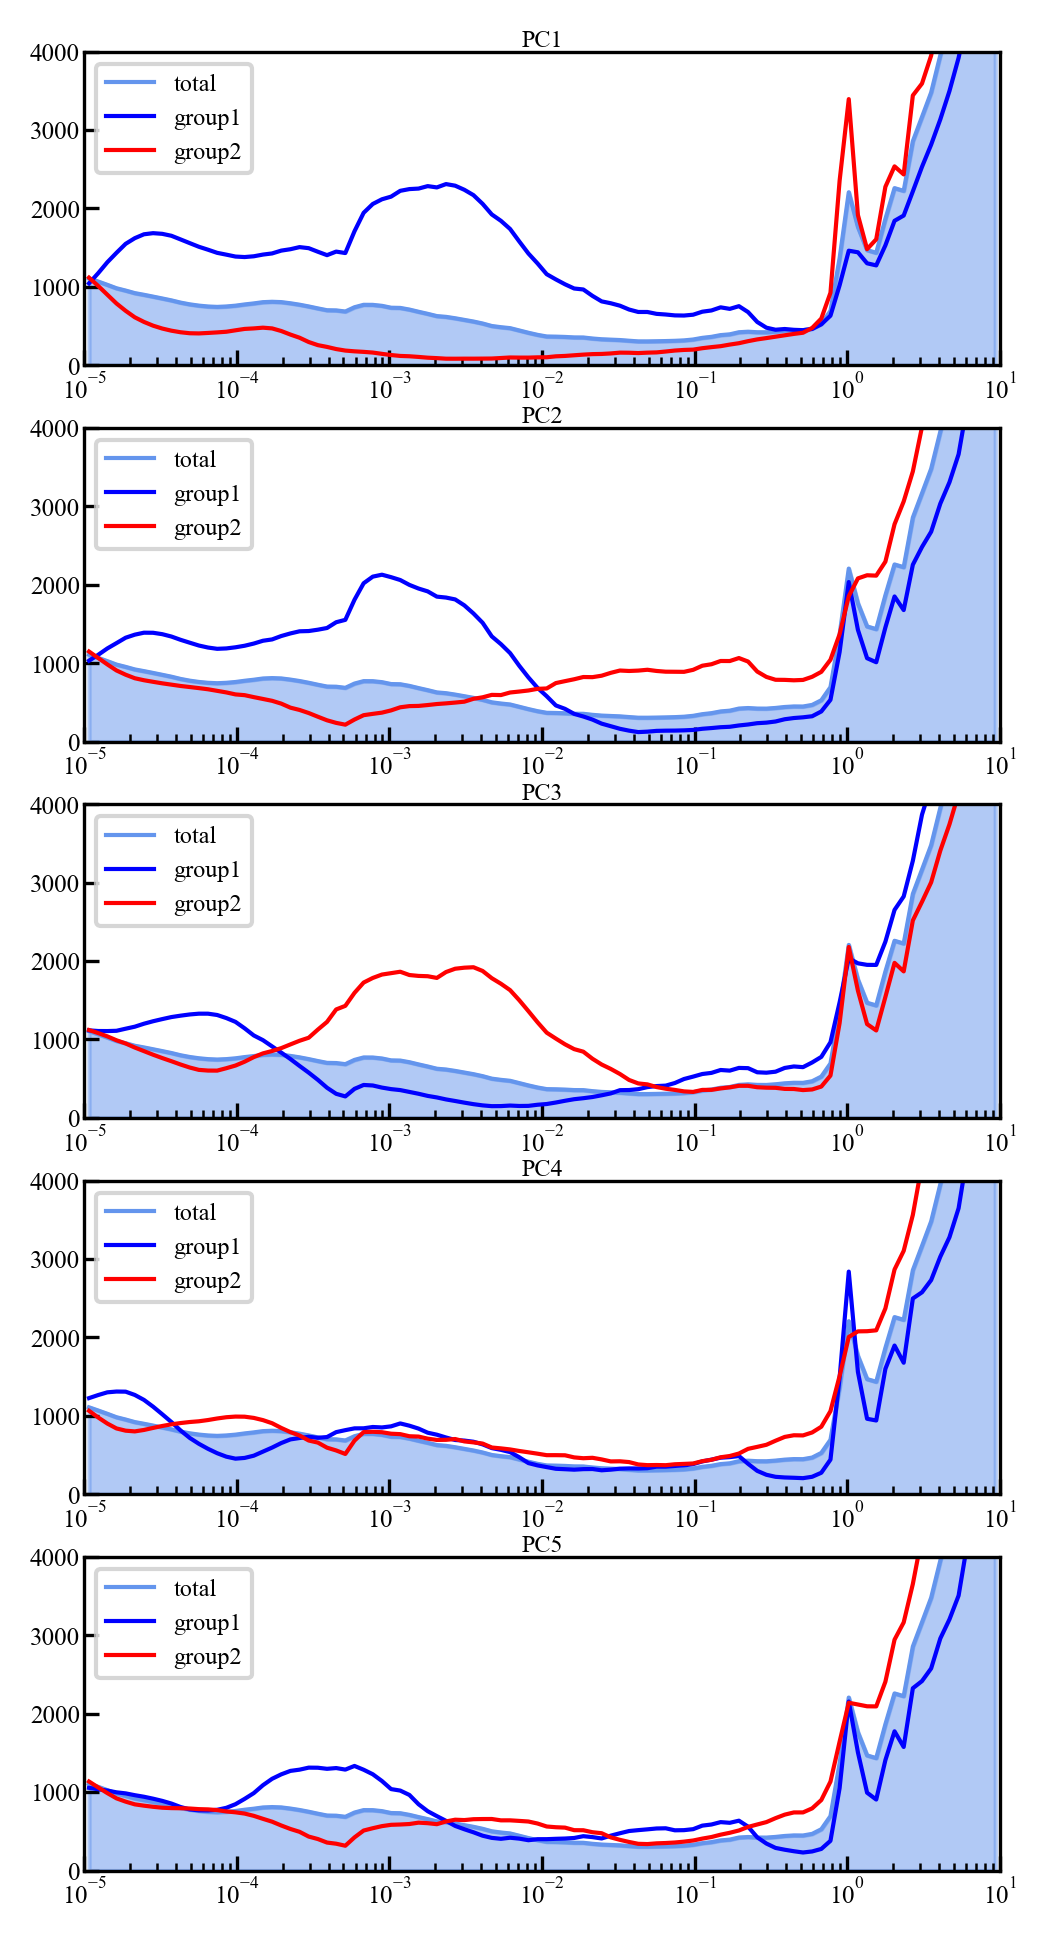

In [33]:
pc_BPY_hold.plot_group_histograms_1d(ylims=(0, 4000))

In [34]:
pc_BPY_hold.save_principal_components(fname='pc_BPY_hold.h5', save_trace_hists=True)

Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\results\histograms\hist_1d_total_for_pc_BPY_hold.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\results\histograms\hist_1d_group1_for_pc_BPY_hold_PC1.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\results\histograms\hist_1d_group2_for_pc_BPY_hold_PC1.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\results\histograms\hist_1d_group1_for_pc_BPY_hold_PC2.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\results\histograms\hist_1d_group2_for_pc_BPY_hold_PC2.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\results\histograms\hist_1d_group1_for_pc_BPY_hold_PC3.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\results\histograms\hist_1d_group2_for_pc_BPY_hold_PC3.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\results\histograms\hist_1d_group1_for_pc_BPY_ho

array([<AxesSubplot:title={'center':'PC1'}>,
       <AxesSubplot:title={'center':'PC2'}>,
       <AxesSubplot:title={'center':'PC3'}>,
       <AxesSubplot:title={'center':'PC4'}>,
       <AxesSubplot:title={'center':'PC5'}>], dtype=object)

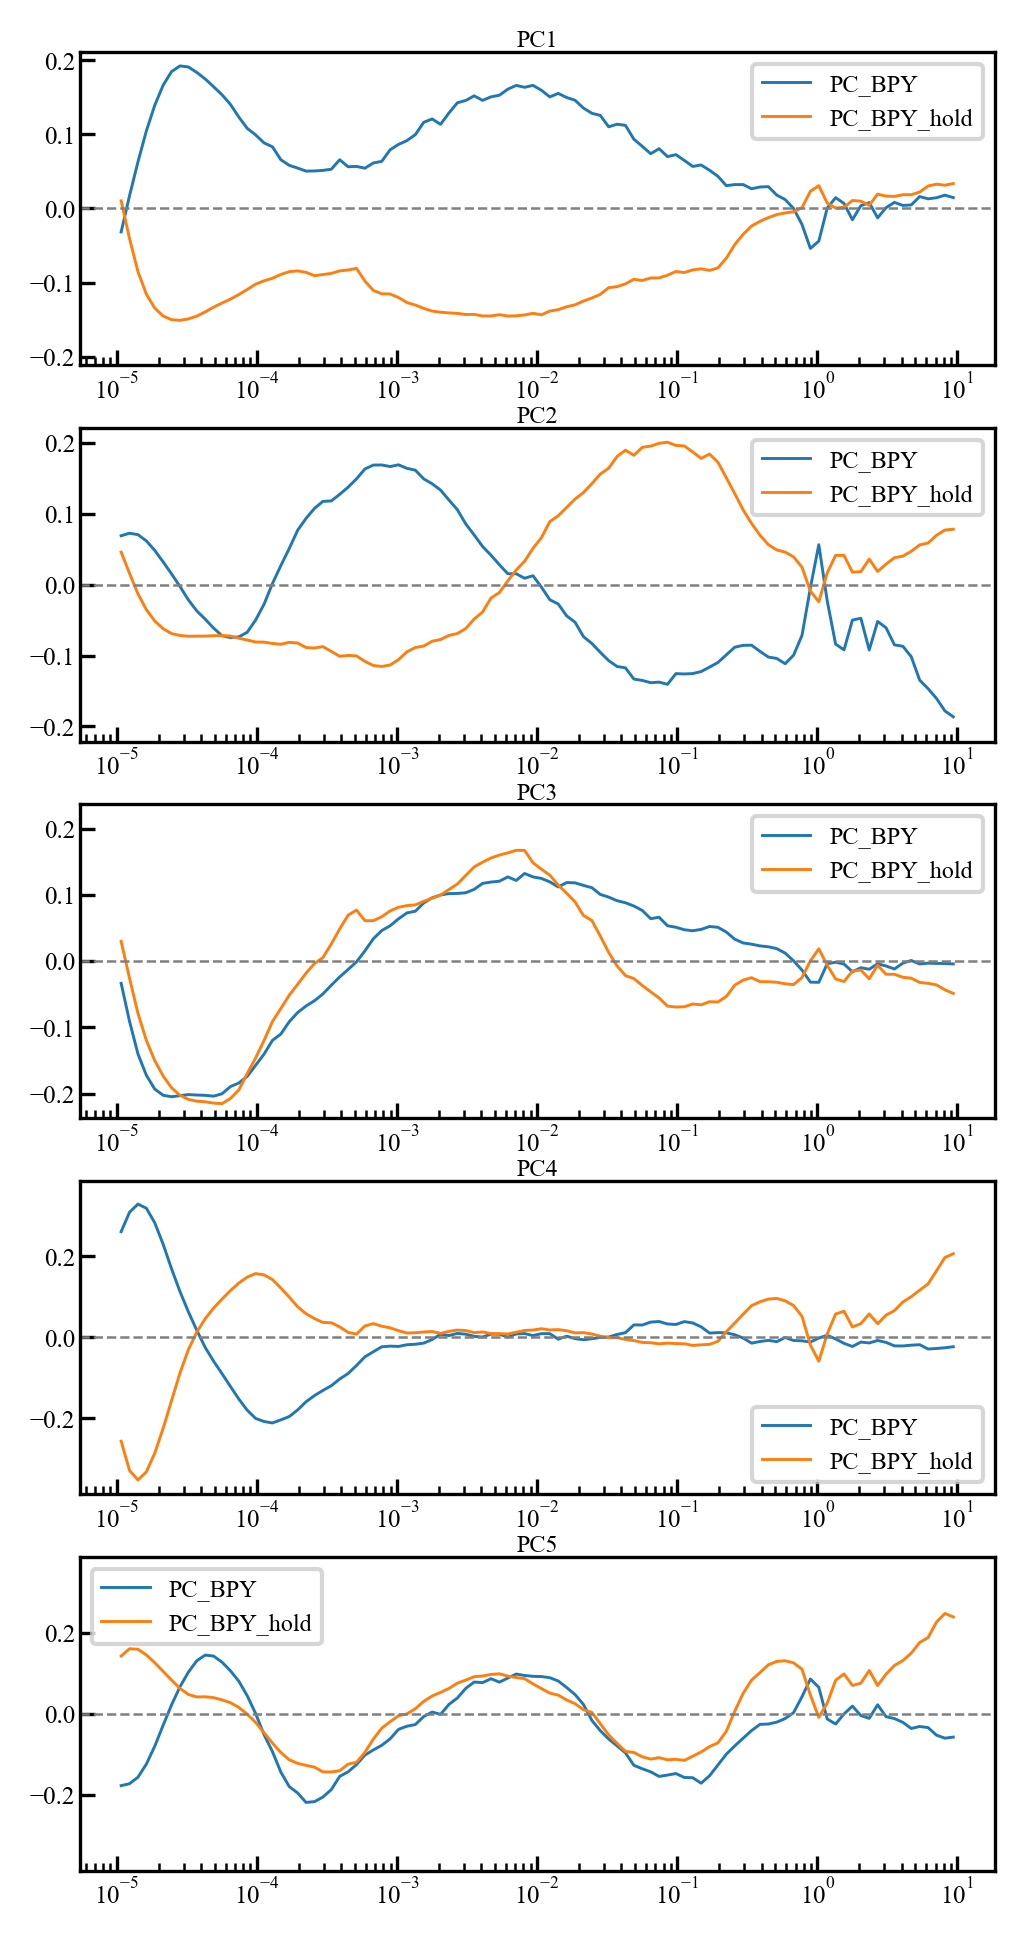

In [35]:
compare_principal_components(pcs=(pc_BPY, pc_BPY_hold), labels=('PC_BPY', 'PC_BPY_hold'), lw=0.7)

Surprisingly the PCs of the conventional and the hold traces are quite similar. Try traces selected by PC2 to see how the hold measurements look for these supposedly molecular traces look.

In [36]:
pc_BPY_hold.traces_group1['PC2']

array([40376,  3193, 40568, ...,  4299,  8930,  4094])

In [37]:
hold_trace = HoldTrace(pc_BPY_hold.traces_group1['PC2'][2], load_from=home_folder)

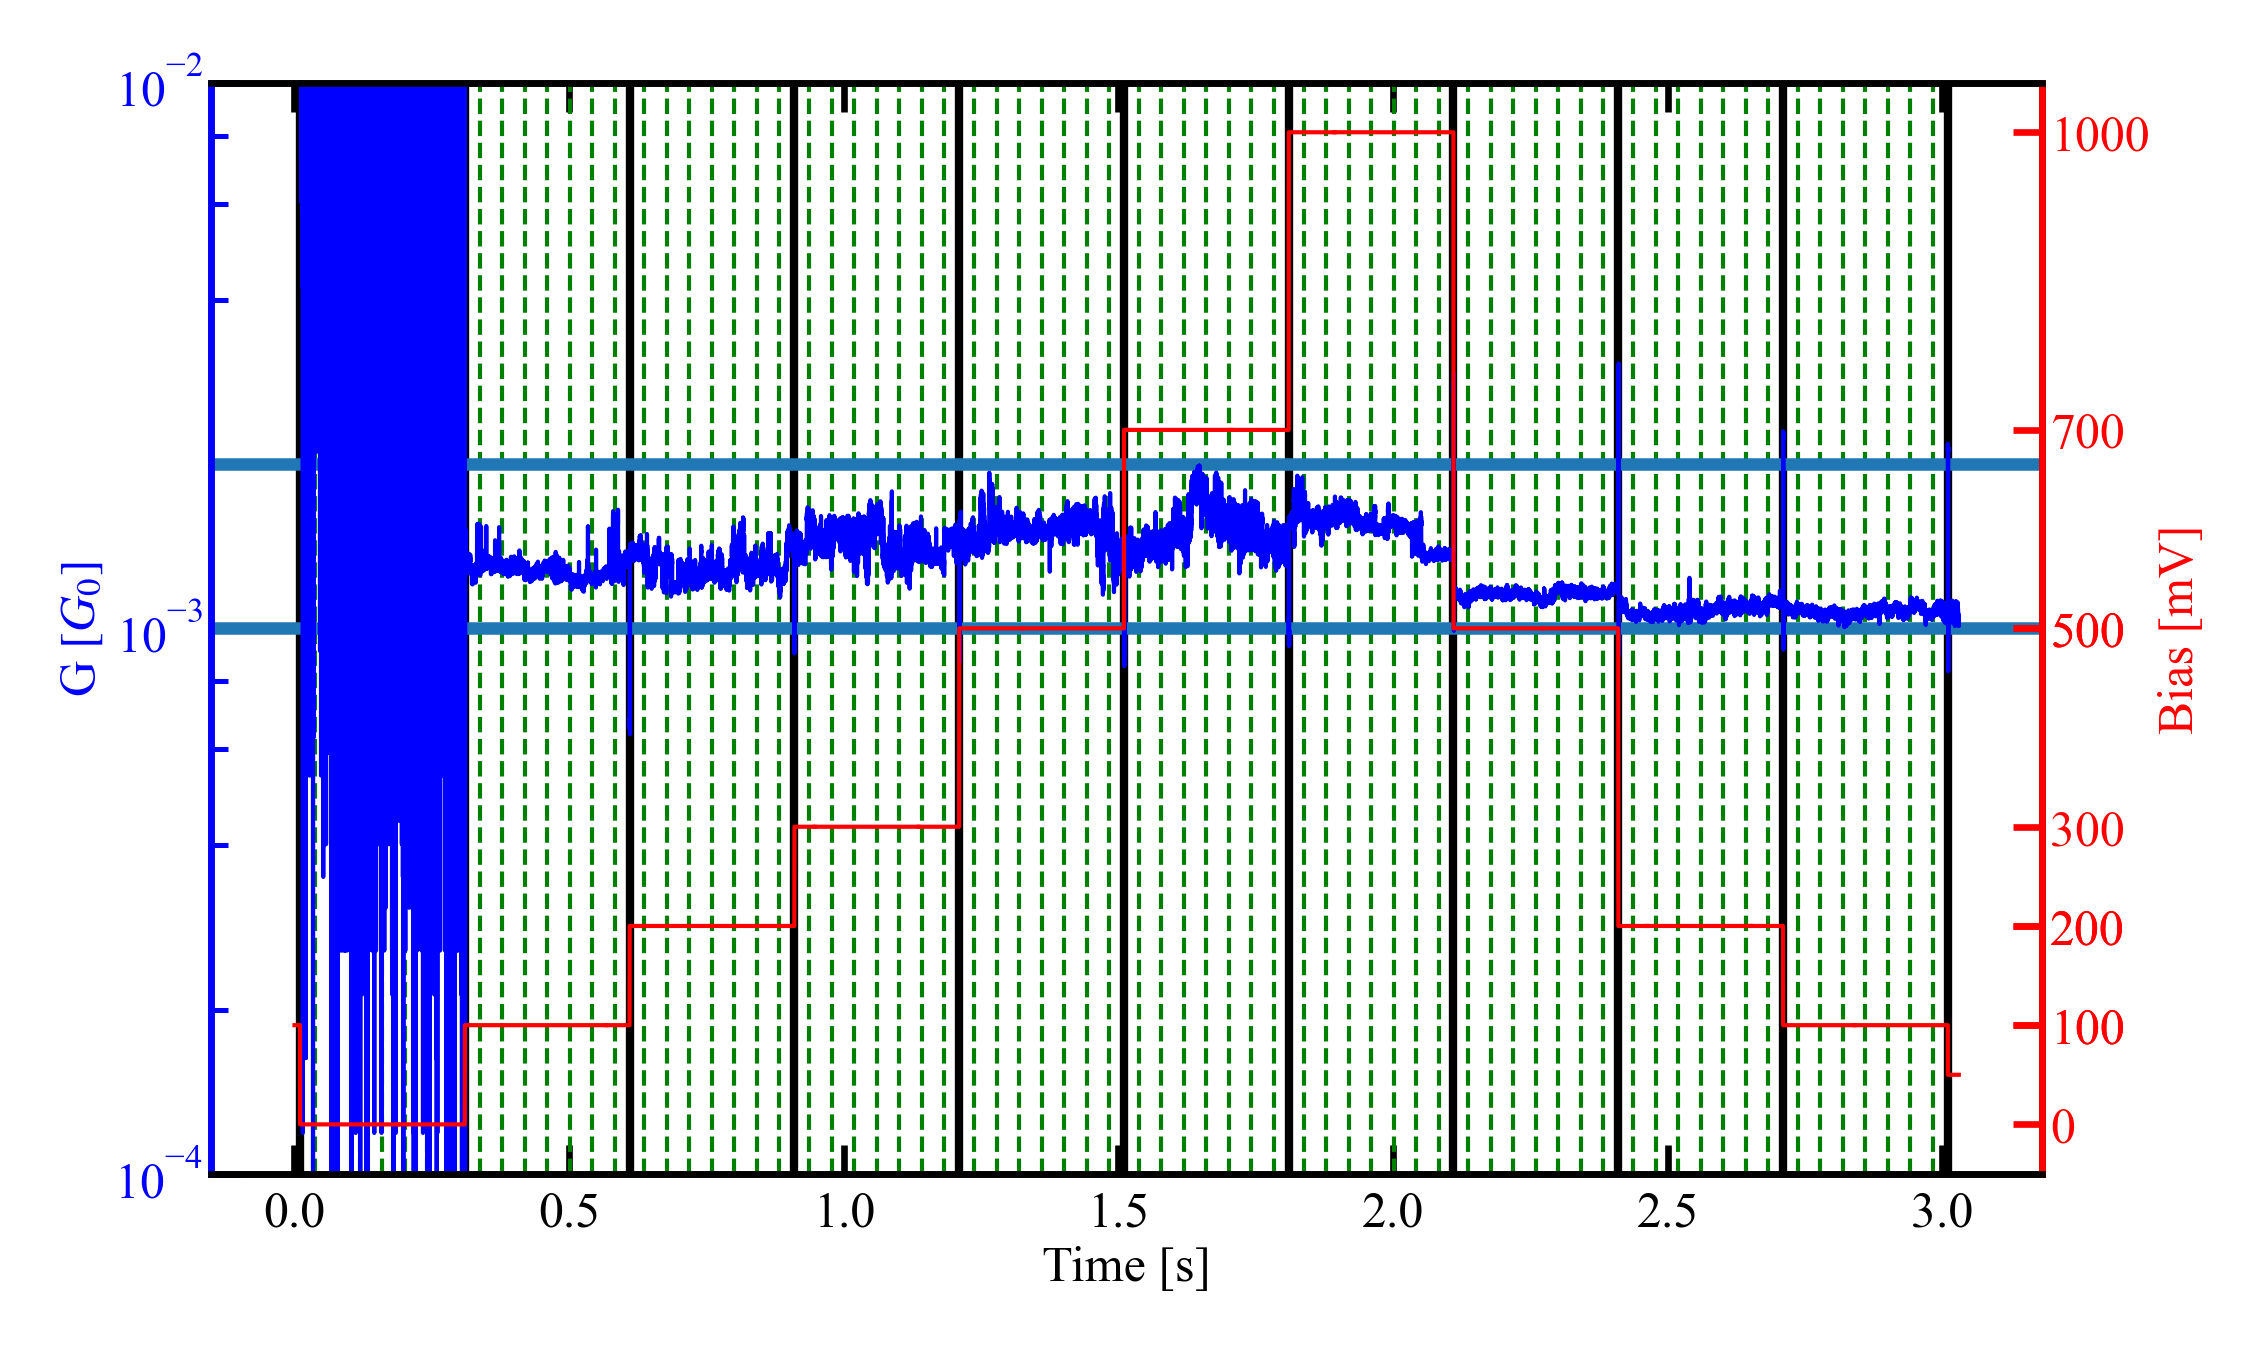

In [38]:
hold_trace = HoldTrace(pc_BPY_hold.traces_group1['PC2'][5427], load_from=home_folder)
hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000))
ax, par = hold_trace.plot_hold_traces(conductance=True, plot_step_ranges=True, plot_psd_intervals=True)

ax.set_ylim(1e-4, 1e-2)
ax.axhline(1e-3)
ax.axhline(2e-3)

In [39]:
hold_trace.psd_intervals_pull.shape

(10, 12288)

In [141]:
noise_stats_pc2_gr1 = NoiseStats(folder=home_folder, traces=pc_BPY_hold.traces_group1['PC2'], num_of_fft=6, save_data=1)

  0%|          | 0/6053 [00:00<?, ?it/s]

D:\mcbj_stmbj\mcbj.py:3315: RuntimeWarning: divide by zero encountered in log10
  np.log10(psd[np.bitwise_and(freq > fit_range[0], freq < fit_range[1])]))


Data saved.
During the analysis the following errors occurred:
Measurement incomplete at 3193
Measurement incomplete at 34344
Measurement incomplete at 19376
Measurement incomplete at 33147
Measurement incomplete at 33787
Measurement incomplete at 34742
Measurement incomplete at 33501
Overflow at trace_33168
Measurement incomplete at 2139
Overflow at trace_34440
Measurement incomplete at 26278
Measurement incomplete at 35386
Measurement incomplete at 34128
Overflow at trace_33372
Overflow at trace_34470
Overflow at trace_34584
Measurement incomplete at 33269
Overflow at trace_34613
Measurement incomplete at 33982
Overflow at trace_35220
Overflow at trace_34297
Overflow at trace_34598
Overflow at trace_34605
Overflow at trace_34358
Overflow at trace_33161
Overflow at trace_33278
Overflow at trace_35177
Overflow at trace_33156
Overflow at trace_20199
Overflow at trace_34586
Overflow at trace_20145
Overflow at trace_34602
Overflow at trace_32024
Measurement incomplete at 34132
Overflow at

In [203]:
conductance_stat_df = pd.read_csv(home_folder.joinpath('results/conductance_stats_pull_1.csv'), header=0, skiprows=[1])

In [204]:
conductance_stat_df.head()

trace_index   G_set    G_stop    G_hold     G_avg   G_beg_1   G_beg_2  \
0      40376.0  0.0005  0.000501  0.000601  0.000443  0.115936  0.000602   
1      40568.0  0.0005  0.000460  0.000697  0.000490  0.042024  0.000608   
2      40380.0  0.0005  0.000492  0.000515  0.000650  0.077318  0.000540   
3      40379.0  0.0005  0.000510  0.000520  0.000713  0.075731  0.000408   
4      40411.0  0.0005  0.000498  0.000550  0.000564  0.085918  0.000651   

    G_beg_3   G_beg_4   G_beg_5  ...   G_end_1   G_end_2   G_end_3   G_end_4  \
0  0.000541  0.000572  0.000580  ...  0.025280  0.000531  0.000560  0.000549   
1  0.000466  0.000475  0.000506  ...  0.153863  0.000463  0.000431  0.000488   
2  0.000599  0.000747  0.000818  ...  0.024410  0.000598  0.000735  0.000780   
3  0.000614  0.000476  0.000626  ...  0.028890  0.000589  0.000451  0.000634   
4  0.000692  0.000683  0.000716  ...  0.034087  0.000668  0.000658  0.000681   

    G_end_5   G_end_6   G_end_7   G_end_8   G_end_9  G_end_10  
0  0.000576  0.000800  0.000781  0.000755  0.000625  0.000463  
1  0.001000  0.000972  0.000921  0.000775  0.000758  0.000473  
2  0.000823  0.000862  0.000840  0.000659  0.000616  0.000639  
3  0.000716  0.000703  0.001143  0.000764  0.000631  0.000769  
4  0.000692  0.000672  0.000889  0.000606  0.000558  0.000559  

[5 rows x 25 columns]

In [359]:
g_beg_list = [f'G_beg_{i}' for i in range(1, 11)]
g_end_list = [f'G_end_{i}' for i in range(1, 11)]

  0%|          | 0/10 [00:00<?, ?it/s]

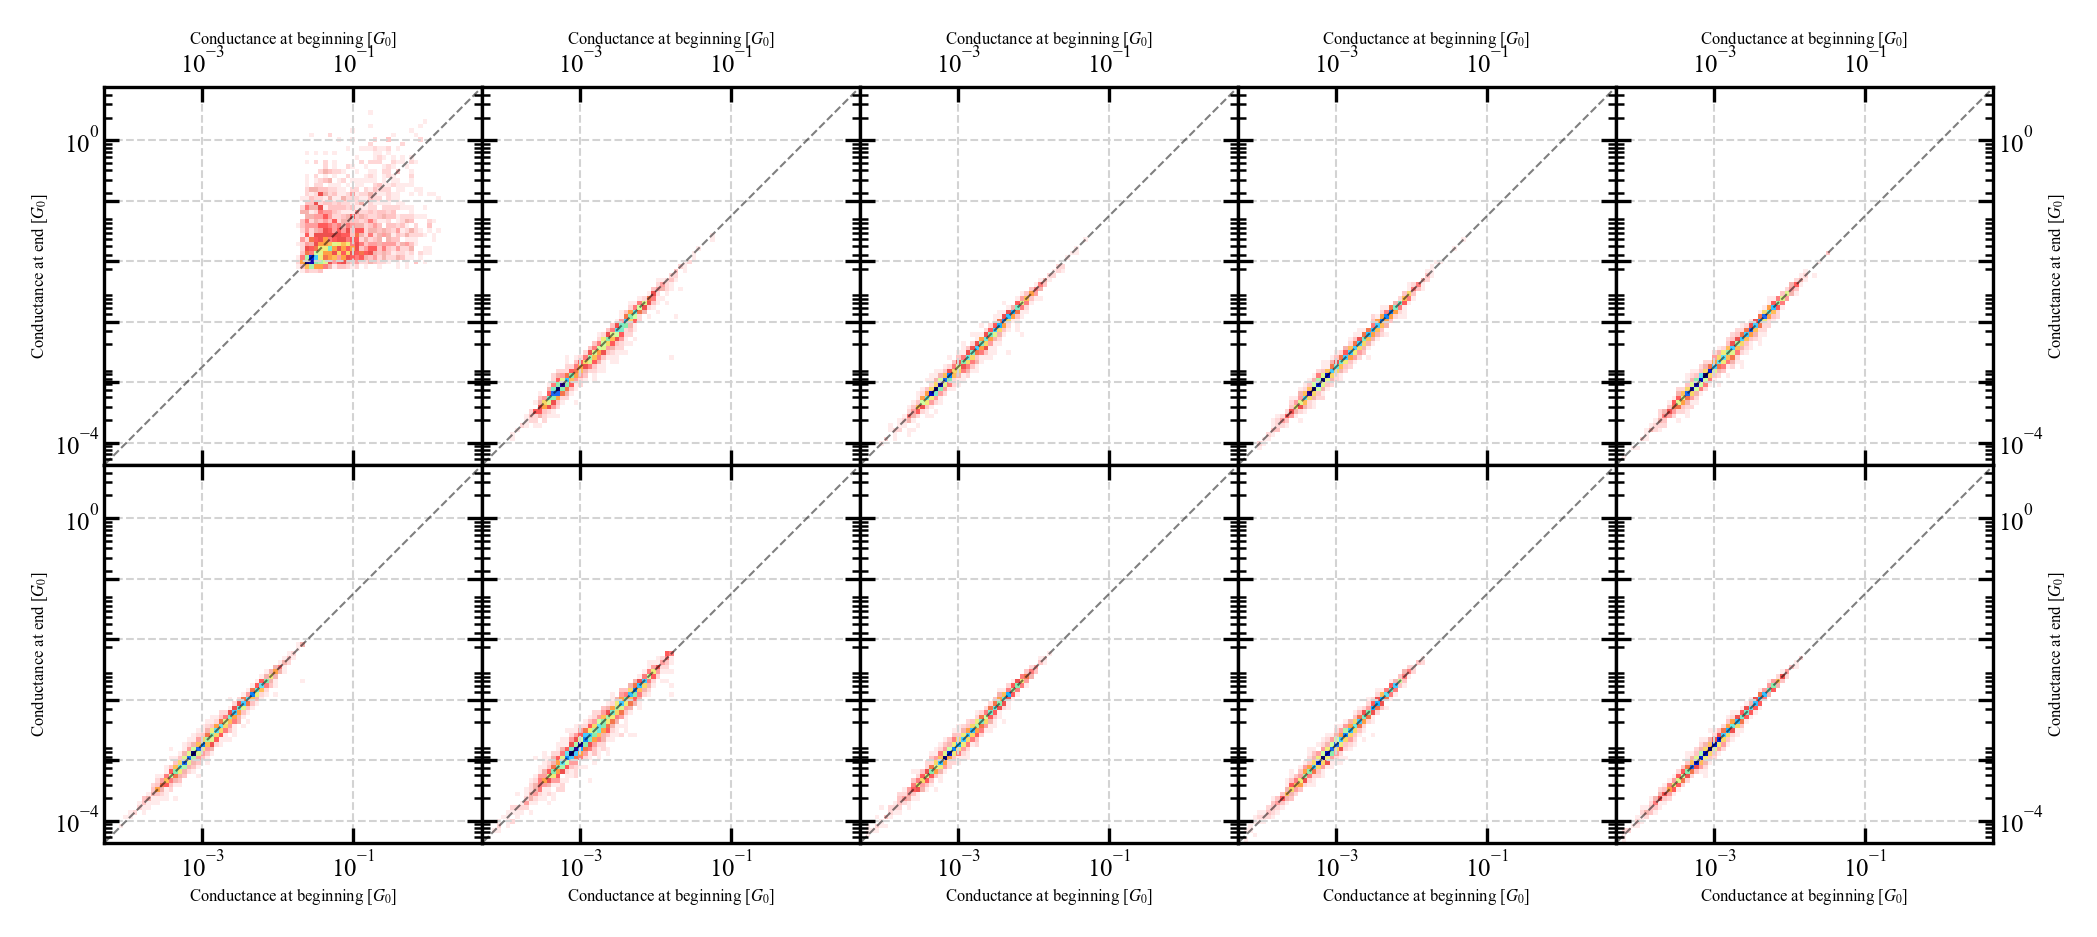

In [365]:
fig = plt.figure(figsize=utils.cm2inch(20, 8), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=5, width_ratios=(1, 1, 1, 1, 1), height_ratios=(1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0, hspace=0)
axs = []
hist_2d_cond_all = []
n_pull_low = np.zeros_like(bias_steps)
n_pull_high = np.zeros_like(bias_steps)

for i in tqdm(range(10)):
    axs.append(fig.add_subplot(gs[i//5, i%5]))
    
    axs[i].set_xlim(5e-5, 5)
    axs[i].set_ylim(5e-5, 5)
    
    if i//5==0:
        axs[i].xaxis.tick_top()
        axs[i].xaxis.set_label_position('top')
    if i%5 == 4:
        axs[i].yaxis.tick_right()
        axs[i].yaxis.set_label_position('right')
        
        axs[i].set_ylabel(r'Conductance at end [$G_{0}$]', fontsize=4)
    if i%5 == 0:
        axs[i].set_ylabel(r'Conductance at end [$G_{0}$]', fontsize=4)
    
    axs[i].set_xlabel(r'Conductance at beginning [$G_{0}$]', fontsize=4)
    axs[i].xaxis.set_ticks_position('both')
    axs[i].yaxis.set_ticks_position('both')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
    x_mesh, y_mesh, hist_2d_cond = utils.calc_hist_2d_single(x=conductance_stat_df[g_beg_list[i]], y=conductance_stat_df[g_end_list[i]],
                                                                    xrange=(1e-5, 10), log_scale_x=True,
                                                                    yrange=(1e-5, 10), log_scale_y=True,
                                                                    num_bins=(100, 100),
                                                                    bin_mode_x='total',
                                                                    bin_mode_y='total')
    
    hist_2d_cond_all.append(hist_2d_cond)
    
    axs[i].plot(np.linspace(1e-5, 10, 10), np.linspace(1e-5, 10, 10), ls='--', c='k', lw=0.5, alpha=0.5)
    
    axs[i].pcolormesh(x_mesh, y_mesh, hist_2d_cond_all[i], cmap=utils.cmap_geo32)
    # axs[i].scatter(noise_pull_df[avg_cond_list[i]], noise_pull_df[noise_pow_list[i]], s=0.5, alpha=0.5, edgecolor='None')
    
    # axs[i].plot(np.linspace(1e-5, 1e-3, 10), np.linspace(1e-5, 1e-3, 10)**2/1000, ls='--', c='b', lw=0.5)
    # axs[i].plot(np.linspace(1e-3, 10, 10), np.linspace(1e-3, 10, 10)/1000000, ls='--', c='r', lw=0.5)
    
    axs[i].grid(c='lightgrey', ls='--', lw=0.5)
    
    axs[i].set_yticks(np.logspace(-4, 0, 6))
    
    if i%5!=0 and i%5!=4:
        axs[i].set_yticklabels(['']*len(axs[i].get_yticks()))

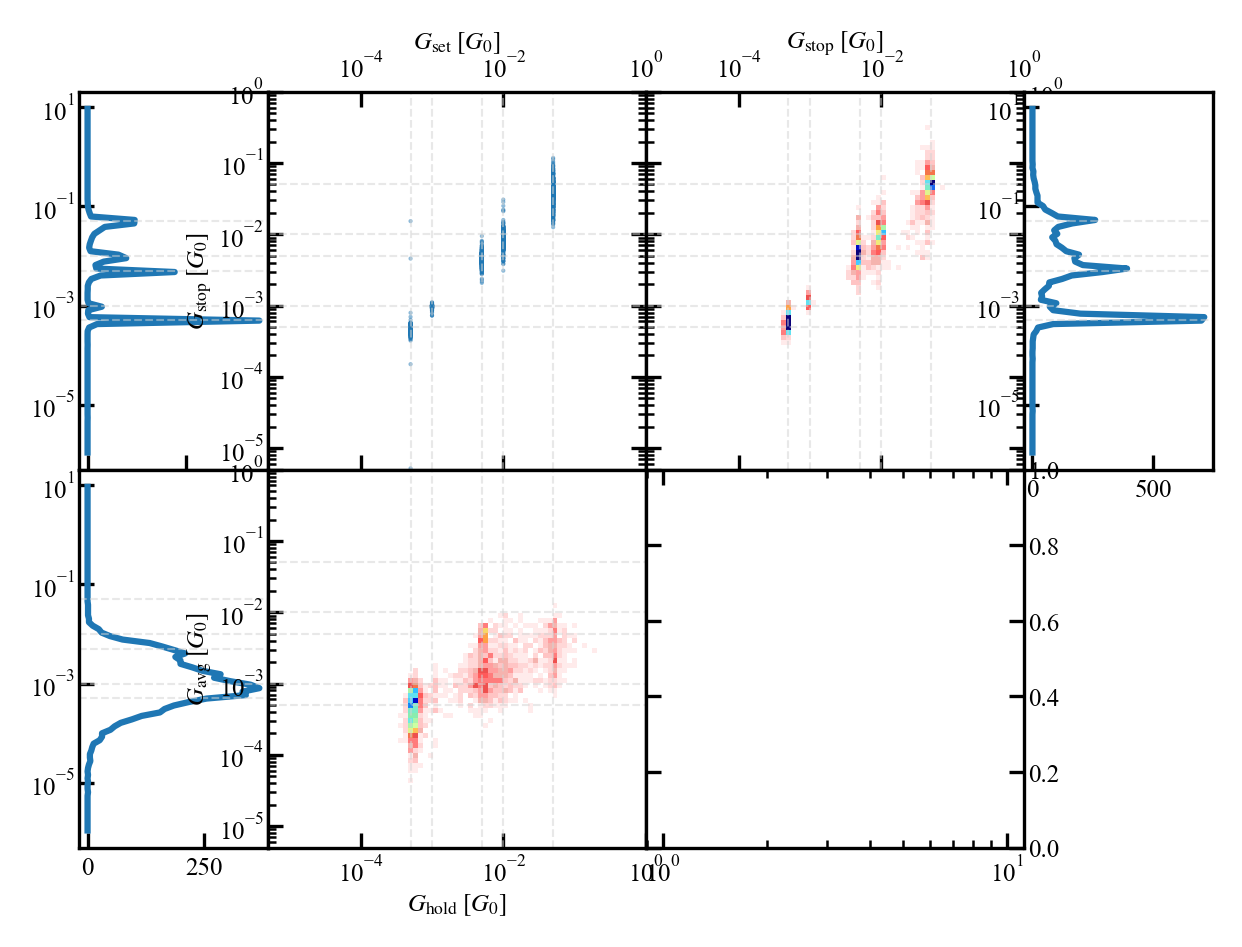

In [205]:
fig = plt.figure(figsize=utils.cm2inch(12, 8), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=4, width_ratios=(1, 2, 2, 1), height_ratios=(1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0, hspace=0)

ax_stop_hist = fig.add_subplot(gs[0, 0])
ax_set_stop = fig.add_subplot(gs[0, 1])
ax_stop_hold = fig.add_subplot(gs[0, 2])
ax_hold_hist = fig.add_subplot(gs[0, 3])
ax_avg_hist = fig.add_subplot(gs[1, 0])
ax_hold_avg = fig.add_subplot(gs[1, 1])
ax_hists = fig.add_subplot(gs[1, 2])

ax_set_stop.set_xlabel(r'$G_{\mathrm{set}}\;[G_{0}]$')
ax_set_stop.set_ylabel(r'$G_{\mathrm{stop}}\;[G_{0}]$')

ax_stop_hold.set_xlabel(r'$G_{\mathrm{stop}}\;[G_{0}]$')
ax_stop_hold.set_ylabel(r'$G_{\mathrm{hold}}\;[G_{0}]$')

ax_hold_avg.set_xlabel(r'$G_{\mathrm{hold}}\;[G_{0}]$')
ax_hold_avg.set_ylabel(r'$G_{\mathrm{avg}}\;[G_{0}]$')

# ax_set_stop.set_aspect('equal')
# ax_stop_hold.set_aspect('equal')
# ax_hold_avg.set_aspect('equal')

ax_set_stop.xaxis.tick_top()
ax_set_stop.xaxis.set_label_position('top')
ax_set_stop.xaxis.set_ticks_position('both')
ax_set_stop.yaxis.set_ticks_position('both')

ax_stop_hold.yaxis.tick_right()
ax_stop_hold.yaxis.set_label_position('right')
ax_stop_hold.xaxis.tick_top()
ax_stop_hold.xaxis.set_label_position('top')
ax_stop_hold.xaxis.set_ticks_position('both')
ax_stop_hold.yaxis.set_ticks_position('both')

ax_hists.yaxis.tick_right()
ax_hists.yaxis.set_label_position('right')
ax_hists.xaxis.set_ticks_position('both')
ax_hists.yaxis.set_ticks_position('both')

for ax in (ax_set_stop, ax_stop_hold, ax_hold_avg):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(5e-6, 1)
    ax.set_ylim(5e-6, 1)
    
ax_hists.set_xscale('log')

bins_stop, hist_stop = utils.calc_hist_1d_single(conductance_stat_df.G_stop, xrange=(1e-6, 10),
                                                 xbins_num=100, log_scale=True, bin_mode='total')
bins_hold, hist_hold = utils.calc_hist_1d_single(conductance_stat_df.G_hold, xrange=(1e-6, 10),
                                                 xbins_num=100, log_scale=True, bin_mode='total')
bins_avg, hist_avg = utils.calc_hist_1d_single(conductance_stat_df.G_avg, xrange=(1e-6, 10),
                                               xbins_num=100, log_scale=True, bin_mode='total')

ax_stop_hist.plot(hist_stop, bins_stop)
ax_hold_hist.plot(hist_hold, bins_hold)
ax_avg_hist.plot(hist_avg, bins_avg)

ax_stop_hist.set_yscale('log')
ax_hold_hist.set_yscale('log')
ax_avg_hist.set_yscale('log')

for set_val in np.unique(conductance_stat_df.G_set):
    ax_stop_hist.axhline(set_val, ls='--', lw=0.5, c='lightgrey', alpha=0.5)
    ax_hold_hist.axhline(set_val, ls='--', lw=0.5, c='lightgrey', alpha=0.5)
    ax_avg_hist.axhline(set_val, ls='--', lw=0.5, c='lightgrey', alpha=0.5)
    ax_set_stop.axhline(set_val, ls='--', lw=0.5, c='lightgrey', alpha=0.5)
    ax_stop_hold.axhline(set_val, ls='--', lw=0.5, c='lightgrey', alpha=0.5)
    ax_hold_avg.axhline(set_val, ls='--', lw=0.5, c='lightgrey', alpha=0.5)
    ax_set_stop.axvline(set_val, ls='--', lw=0.5, c='lightgrey', alpha=0.5)
    ax_stop_hold.axvline(set_val, ls='--', lw=0.5, c='lightgrey', alpha=0.5)
    ax_hold_avg.axvline(set_val, ls='--', lw=0.5, c='lightgrey', alpha=0.5)
    
x_mesh, y_mesh, hist_2d_stop_hold = utils.calc_hist_2d_single(x=conductance_stat_df.G_stop, y=conductance_stat_df.G_hold,
                                                         xrange=(1e-6, 10), log_scale_x=True,
                                                         yrange=(1e-6, 10), log_scale_y=True,
                                                         num_bins=(100, 100),
                                                         bin_mode_x='total',
                                                         bin_mode_y='total')

x_mesh, y_mesh, hist_2d_hold_avg = utils.calc_hist_2d_single(x=conductance_stat_df.G_hold, y=conductance_stat_df.G_avg,
                                                         xrange=(1e-6, 10), log_scale_x=True,
                                                         yrange=(1e-6, 10), log_scale_y=True,
                                                         num_bins=(100, 100),
                                                         bin_mode_x='total',
                                                         bin_mode_y='total')

ax_set_stop.scatter(conductance_stat_df.G_set, conductance_stat_df.G_stop, s=1, alpha=0.5, edgecolor='None')
# ax_stop_hold.scatter(conductance_stat_df.G_stop, conductance_stat_df.G_hold, s=1, alpha=0.5, edgecolor='None')
# ax_hold_avg.scatter(conductance_stat_df.G_hold, conductance_stat_df.G_avg, s=1, alpha=0.5, edgecolor='None')
ax_stop_hold.pcolormesh(x_mesh, y_mesh, hist_2d_stop_hold, cmap=utils.cmap_geo32, vmax=100)
ax_hold_avg.pcolormesh(x_mesh, y_mesh, hist_2d_hold_avg, cmap=utils.cmap_geo32, vmax=100)

In [206]:
np.unique(conductance_stat_df.G_set)

array([0.0005, 0.001 , 0.005 , 0.01  , 0.05  ])

In [226]:
noise_pull_df = pd.read_csv(home_folder.joinpath('results/noise_stats_pull_1.csv'), header=0, skiprows=[1])
noise_pull_df.head()

trace_index  avg_cond_on_step_1  avg_current_on_step_1  noise_power_1  \
0        40376            0.010516          -9.864488e-12       0.000069   
1        40568            0.006840          -6.589585e-12       0.000082   
2        40380            0.013051          -1.202371e-11       0.000086   
3        40379            0.011964          -1.110720e-11       0.000063   
4        40411            0.006212          -6.012352e-12       0.000086   

   conductance_noise_1  current_noise_1  avg_cond_on_step_2  \
0             0.791861        -0.856350            0.000566   
1             1.324851        -1.395029            0.000616   
2             0.709794        -0.781531            0.000572   
3             0.661822        -0.723139            0.000439   
4             1.491136        -1.562871            0.000645   

   avg_current_on_step_2  noise_power_2  conductance_noise_2  ...  \
0           4.366448e-09   1.113164e-10             0.018648  ...   
1           4.752031e-09   2.757103e-10             0.026956  ...   
2           4.412925e-09   9.784063e-11             0.017298  ...   
3           3.393145e-09   3.187546e-10             0.040647  ...   
4           4.971623e-09   5.700137e-11             0.011713  ...   

   avg_cond_on_step_9  avg_current_on_step_9  noise_power_9  \
0            0.000653           1.007700e-08   1.679660e-09   
1            0.000694           1.070851e-08   3.376238e-10   
2            0.000615           9.485838e-09   1.863097e-10   
3            0.000663           1.023331e-08   4.719299e-10   
4            0.000566           8.743783e-09   8.886324e-11   

   conductance_noise_9  current_noise_9  avg_cond_on_step_10  \
0             0.062737         0.063055             0.000540   
1             0.026460         0.026603             0.000726   
2             0.022203         0.022309             0.000601   
3             0.032744         0.032913             0.000667   
4             0.016642         0.016715             0.000563   

   avg_current_on_step_10  noise_power_10  conductance_noise_10  \
0            4.166630e-09    4.571415e-10              0.039610   
1            5.596193e-09    3.379006e-10              0.025319   
2            4.639201e-09    8.820715e-11              0.015620   
3            5.145030e-09    2.680656e-10              0.024540   
4            4.341669e-09    6.942785e-11              0.014812   

   current_noise_10  
0          0.039776  
1          0.025461  
2          0.015692  
3          0.024667  
4          0.014876  

[5 rows x 51 columns]

In [208]:
noise_push_df = pd.read_csv(home_folder.joinpath('results/noise_stats_push_1.csv'), header=0, skiprows=[1])
noise_push_df.head()

trace_index  avg_cond_on_step_1  avg_current_on_step_1  noise_power_1  \
0        40376            0.012843          -1.184942e-11       0.000068   
1        40568            0.010763          -1.007795e-11       0.000065   
2        40380            0.012810          -1.182208e-11       0.000062   
3        40379            0.012498          -1.155949e-11       0.000082   
4        40411            0.011573          -1.077420e-11       0.000069   

   conductance_noise_1  current_noise_1  avg_cond_on_step_2  \
0             0.642082        -0.705941            0.000082   
1             0.750699        -0.813269            0.000054   
2             0.615097        -0.676118            0.000092   
3             0.725158        -0.795345            0.000088   
4             0.719502        -0.783986            0.000070   

   avg_current_on_step_2  noise_power_2  conductance_noise_2  ...  \
0           6.325642e-10   6.791951e-12             0.031915  ...   
1           4.205698e-10   6.739140e-12             0.047826  ...   
2           7.135122e-10   1.519368e-10             0.133814  ...   
3           6.834177e-10   6.378392e-12             0.028625  ...   
4           5.442943e-10   2.547029e-12             0.022716  ...   

   avg_cond_on_step_9  avg_current_on_step_9  noise_power_9  \
0            0.000087           1.345261e-09   3.435543e-12   
1            0.000012           1.792536e-10   7.080787e-13   
2            0.000223           3.446936e-09   6.084218e-11   
3            0.000095           1.472848e-09   1.247262e-11   
4            0.000055           8.514278e-10   2.800398e-11   

   conductance_noise_9  current_noise_9  avg_cond_on_step_10  \
0             0.021347         0.021361             0.000078   
1             0.072773         0.072780             0.000011   
2             0.035023         0.035084             0.000205   
3             0.037148         0.037176             0.000096   
4             0.096320         0.096361             0.000048   

   avg_current_on_step_10  noise_power_10  conductance_noise_10  \
0            6.013682e-10    1.139310e-11              0.043481   
1            8.498480e-11    1.186027e-12              0.099323   
2            1.587584e-09    7.513342e-11              0.042254   
3            7.453527e-10    4.553726e-12              0.022176   
4            3.683088e-10    1.444155e-11              0.079949   

   current_noise_10  
0          0.043507  
1          0.099331  
2          0.042321  
3          0.022192  
4          0.079979  

[5 rows x 51 columns]

In [331]:
noise_pow_list = [f'noise_power_{i}' for i in range(1, 11)]
cond_noise_list = [f'conductance_noise_{i}' for i in range(1, 11)]
avg_cond_list = [f'avg_cond_on_step_{i}' for i in range(1, 11)]

In [224]:
bias_steps = np.array(pd.read_csv(home_folder.joinpath('results/noise_stats_push_1.csv'), header=0)[noise_pow_list].iloc[0])

In [317]:
cond_range=(1e-4, 1e-3)
test = noise_pull_df['avg_cond_on_step_2'].to_numpy()
np.where(np.bitwise_and(test >= cond_range[0], test < cond_range[1]))

(array([   0,    1,    2, ..., 5691, 5695, 5698], dtype=int64),)

In [305]:
type(noise_pull_df['avg_cond_on_step_2'].to_numpy())
isinstance(noise_pull_df['avg_cond_on_step_2'].to_numpy(), np.ndarray)

True

In [334]:
def calc_correlation(avg_cond, noise_power, cond_range:Tuple[float, float] = (1e-4, 1e-2), N = np.linspace(0.5, 2.5, num=1000)):
    corr = np.zeros_like(N)
    
    if not isinstance(avg_cond, np.ndarray):
        avg_cond = avg_cond.to_numpy()
        
    if not isinstance(avg_cond, np.ndarray):
        noise_power = noise_power.to_numpy()
    
    in_range = np.where(np.bitwise_and(avg_cond >= cond_range[0],
                                       avg_cond < cond_range[1]))[0]

    for i, n in enumerate(N):
        corr[i] = utils.calc_correlation(np.log10(noise_power[in_range]/ \
                                                  avg_cond[in_range]**n),
                                         np.log10(avg_cond[in_range]))
        
    return N, corr, N[abs(corr) == min(abs(corr))][0]

  0%|          | 0/10 [00:00<?, ?it/s]

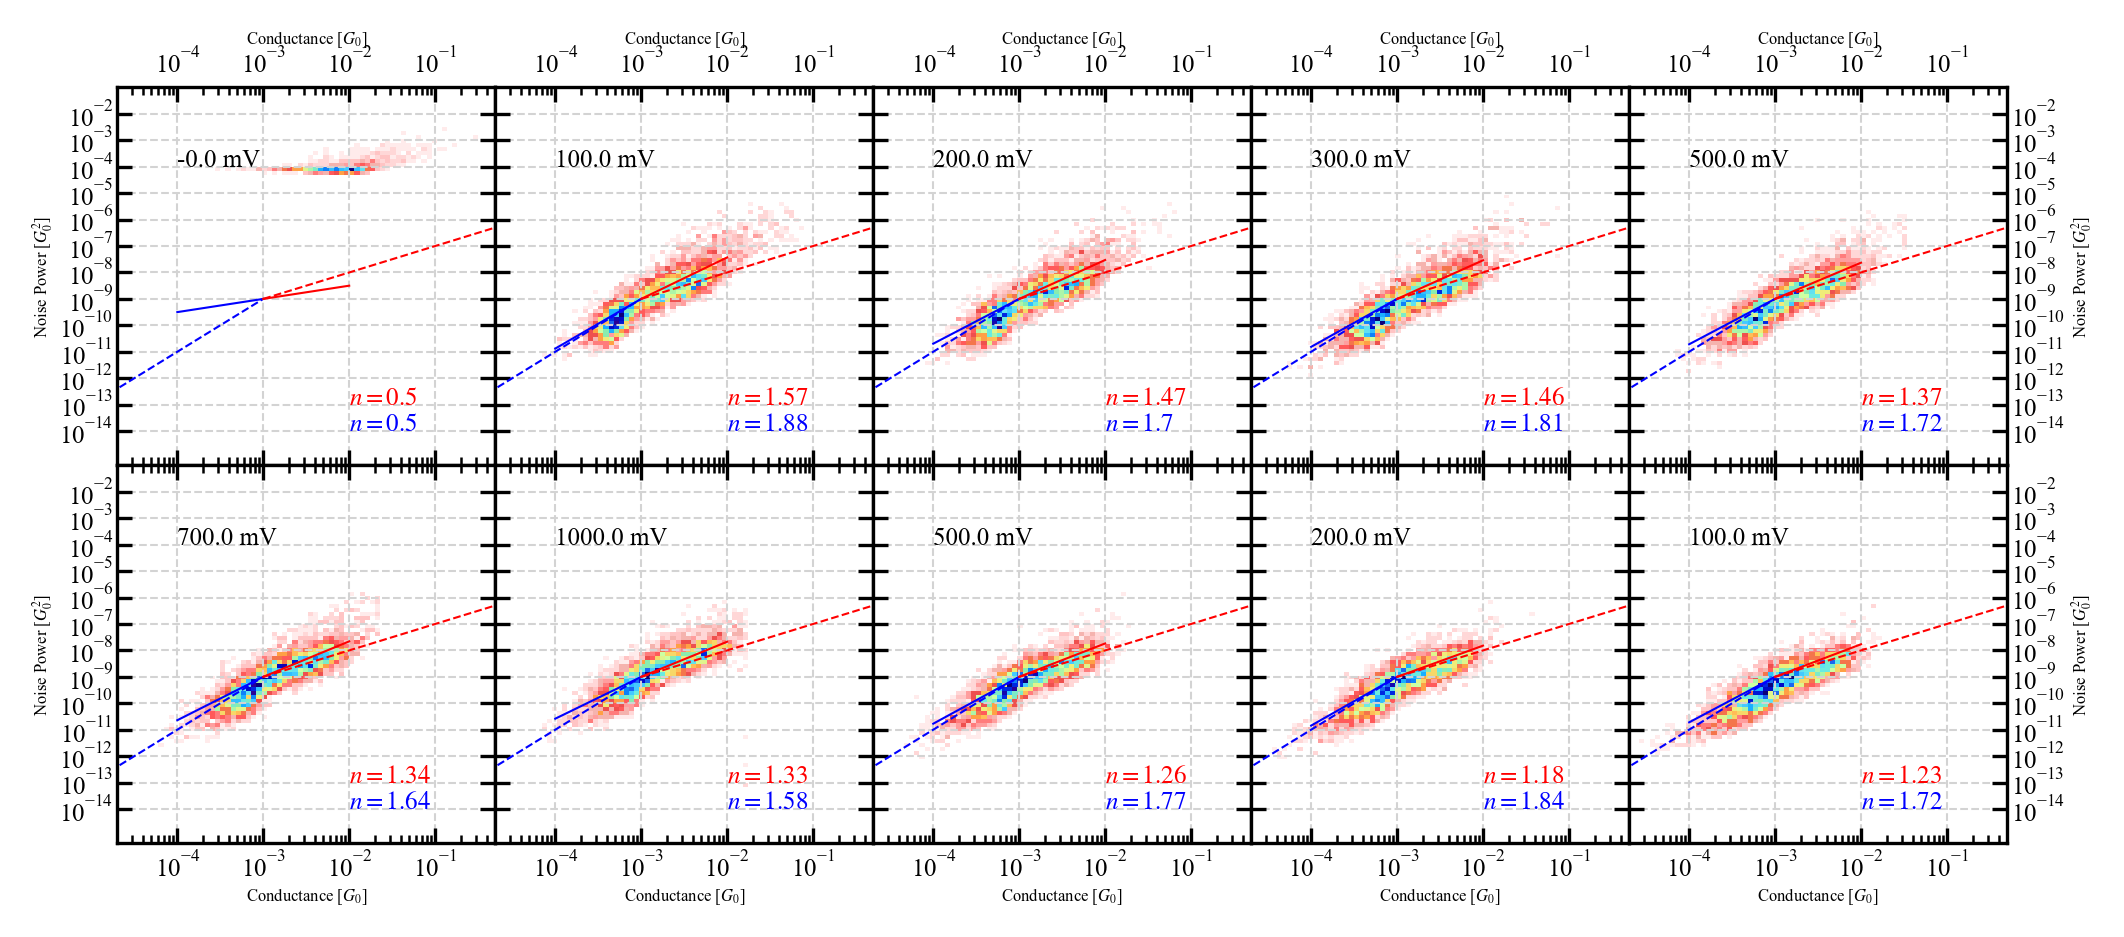

In [355]:
fig = plt.figure(figsize=utils.cm2inch(20, 8), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=5, width_ratios=(1, 1, 1, 1, 1), height_ratios=(1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0, hspace=0)
axs = []
hist_2d_noise_pow_all = []
n_pull_low = np.zeros_like(bias_steps)
n_pull_high = np.zeros_like(bias_steps)

for i in tqdm(range(10)):
    axs.append(fig.add_subplot(gs[i//5, i%5]))
    
    axs[i].set_xlim(2e-5, 0.5)
    axs[i].set_ylim(5e-16, 0.1)
    
    if i//5==0:
        axs[i].xaxis.tick_top()
        axs[i].xaxis.set_label_position('top')
    if i%5 == 4:
        axs[i].yaxis.tick_right()
        axs[i].yaxis.set_label_position('right')
        
        axs[i].set_ylabel(r'Noise Power [$G^{2}_{0}$]', fontsize=4)
    if i%5 == 0:
        axs[i].set_ylabel(r'Noise Power [$G^{2}_{0}$]', fontsize=4)
    
    axs[i].set_xlabel(r'Conductance [$G_{0}$]', fontsize=4)
    axs[i].xaxis.set_ticks_position('both')
    axs[i].yaxis.set_ticks_position('both')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
    x_mesh, y_mesh, hist_2d_noise_power = utils.calc_hist_2d_single(x=noise_pull_df[avg_cond_list[i]], y=noise_pull_df[noise_pow_list[i]],
                                                                    xrange=(1e-5, 10), log_scale_x=True,
                                                                    yrange=(1e-16, 0.1), log_scale_y=True,
                                                                    num_bins=(100, 100),
                                                                    bin_mode_x='total',
                                                                    bin_mode_y='total')
    
    hist_2d_noise_pow_all.append(hist_2d_noise_power)
    
    axs[i].pcolormesh(x_mesh, y_mesh, hist_2d_noise_pow_all[i], cmap=utils.cmap_geo32)
    # axs[i].scatter(noise_pull_df[avg_cond_list[i]], noise_pull_df[noise_pow_list[i]], s=0.5, alpha=0.5, edgecolor='None')
    
    axs[i].plot(np.linspace(1e-5, 1e-3, 10), np.linspace(1e-5, 1e-3, 10)**2/1000, ls='--', c='b', lw=0.5)
    axs[i].plot(np.linspace(1e-3, 10, 10), np.linspace(1e-3, 10, 10)/1000000, ls='--', c='r', lw=0.5)
    
    axs[i].grid(c='lightgrey', ls='--', lw=0.5)
    
    axs[i].set_yticks(np.logspace(start=-14, stop=-2, num=13))
    axs[i].text(1e-4, 1e-4, f'{np.round(bias_steps[i]*1000)} mV', fontsize=6)
    
    N, corr, n_pull_low[i] = calc_correlation(noise_pull_df[avg_cond_list[i]], noise_pull_df[noise_pow_list[i]], cond_range=(1e-4, 1e-3))
    N, corr, n_pull_high[i] = calc_correlation(noise_pull_df[avg_cond_list[i]], noise_pull_df[noise_pow_list[i]], cond_range=(1e-3, 1e-2))
    
    axs[i].text(1e-2, 1e-14, f'$n={np.around(n_pull_low[i], 2)}$', c='b', fontsize=6)
    axs[i].text(1e-2, 1e-13, f'$n={np.around(n_pull_high[i], 2)}$', c='r', fontsize=6)
    
    axs[i].plot(np.linspace(1e-4, 1e-3, 10), np.linspace(1e-4, 1e-3, 10)**n_pull_low[i]/(np.linspace(1e-4, 1e-3, 10)**n_pull_low[i])[-1]*1e-9, ls='-', c='b', lw=0.5)
    axs[i].plot(np.linspace(1e-3, 1e-2, 10), np.linspace(1e-3, 1e-2, 10)**n_pull_high[i]/(np.linspace(1e-3, 1e-2, 10)**n_pull_high[i])[0]*1e-9, ls='-', c='r', lw=0.5)
    
    if i%5!=0 and i%5!=4:
        axs[i].set_yticklabels(['']*len(axs[i].get_yticks()))

  0%|          | 0/10 [00:00<?, ?it/s]

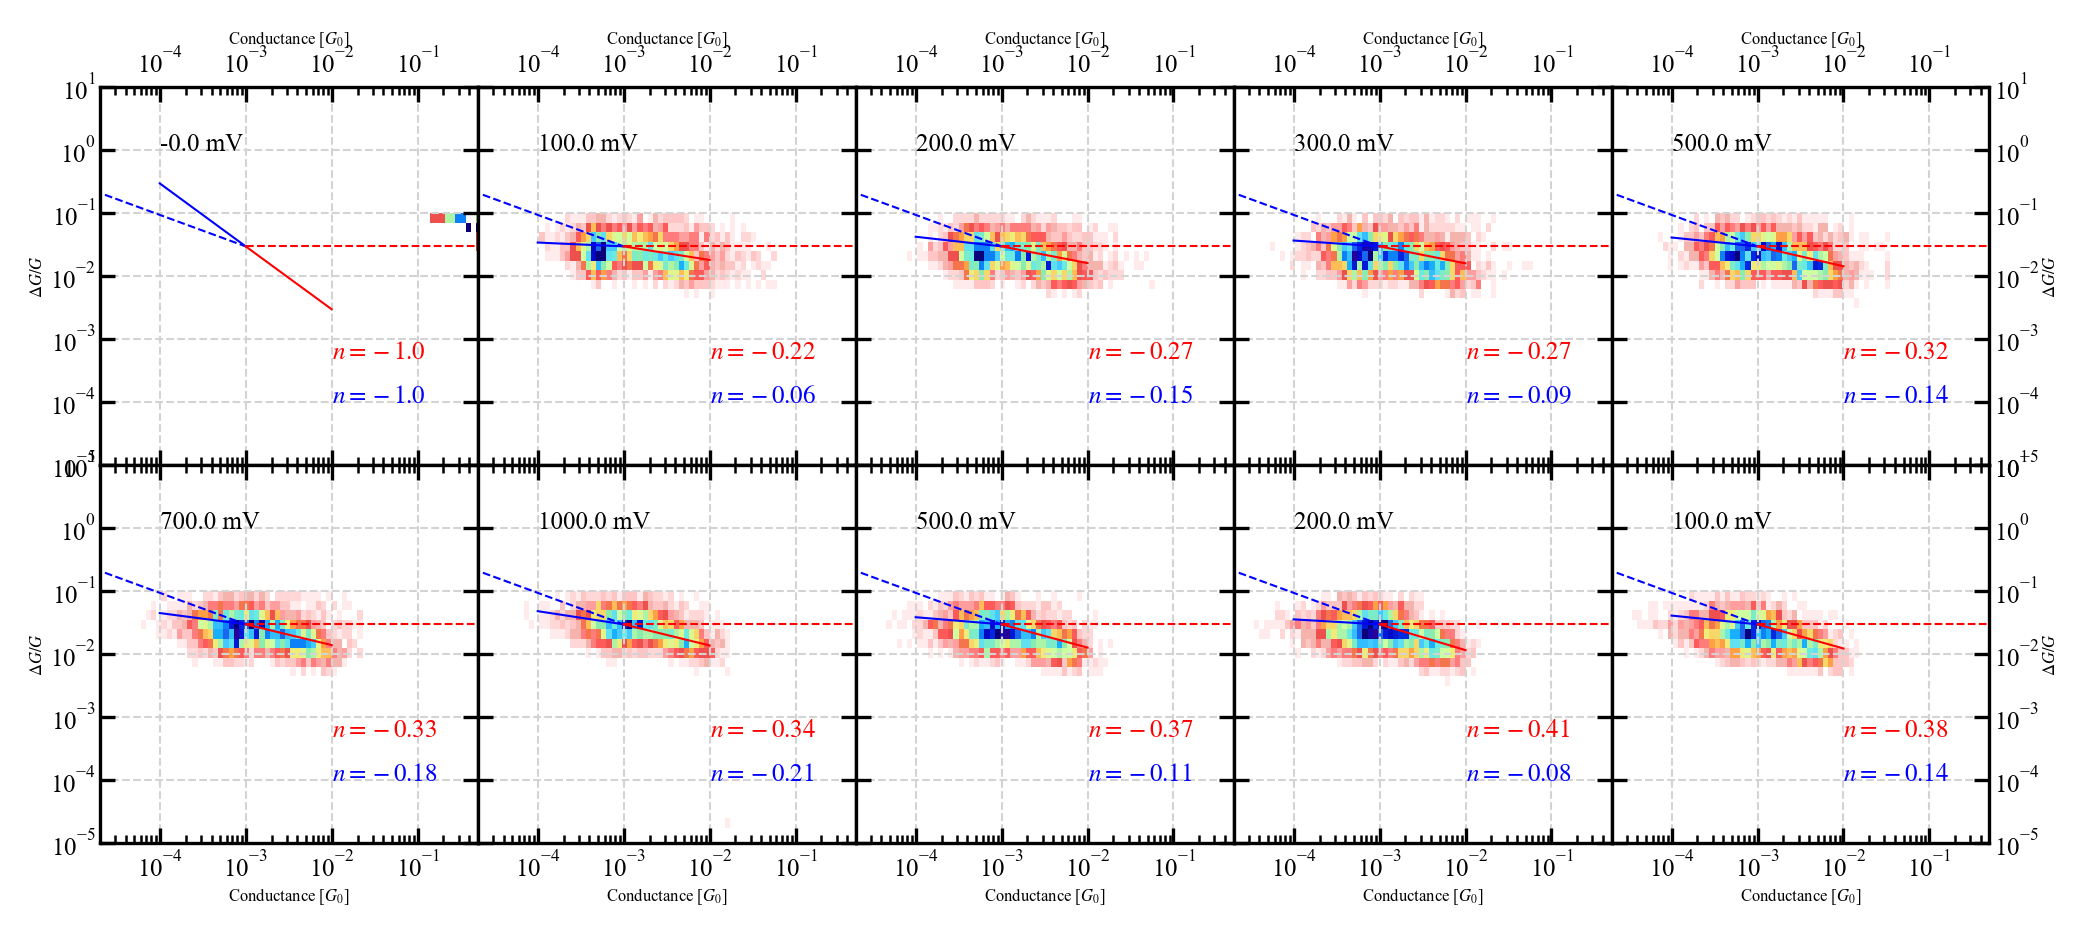

In [367]:
fig = plt.figure(figsize=utils.cm2inch(20, 8), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=5, width_ratios=(1, 1, 1, 1, 1), height_ratios=(1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0, hspace=0)
axs = []
hist_2d_cond_noise_all = []
n_pull_low = np.zeros_like(bias_steps)
n_pull_high = np.zeros_like(bias_steps)

for i in tqdm(range(10)):
    axs.append(fig.add_subplot(gs[i//5, i%5]))
    
    axs[i].set_xlim(2e-5, 0.5)
    axs[i].set_ylim(1e-3, 10)
    
    if i//5==0:
        axs[i].xaxis.tick_top()
        axs[i].xaxis.set_label_position('top')
    if i%5 == 4:
        axs[i].yaxis.tick_right()
        axs[i].yaxis.set_label_position('right')
        
        axs[i].set_ylabel(r'$\Delta G / G$', fontsize=4)
    if i%5 == 0:
        axs[i].set_ylabel(r'$\Delta G / G$', fontsize=4)
    
    axs[i].set_xlabel(r'Conductance [$G_{0}$]', fontsize=4)
    axs[i].xaxis.set_ticks_position('both')
    axs[i].yaxis.set_ticks_position('both')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
    x_mesh, y_mesh, hist_2d_cond_noise = utils.calc_hist_2d_single(x=noise_pull_df[avg_cond_list[i]], y=noise_pull_df[cond_noise_list[i]],
                                                                    xrange=(1e-5, 10), log_scale_x=True,
                                                                    yrange=(1e-16, 0.1), log_scale_y=True,
                                                                    num_bins=(100, 100),
                                                                    bin_mode_x='total',
                                                                    bin_mode_y='total')
    
    hist_2d_cond_noise_all.append(hist_2d_cond_noise)
    
    axs[i].pcolormesh(x_mesh, y_mesh, hist_2d_cond_noise_all[i], cmap=utils.cmap_geo32)
    # axs[i].scatter(noise_pull_df[avg_cond_list[i]], noise_pull_df[noise_pow_list[i]], s=0.5, alpha=0.5, edgecolor='None')
    
    axs[i].plot(np.linspace(1e-5, 1e-3, 10), np.linspace(1e-5, 1e-3, 10)**(-0.5)/(np.linspace(1e-5, 1e-3, 10)**(-0.5))[-1]*3e-2, ls='--', c='b', lw=0.5)
    axs[i].plot(np.linspace(1e-3, 10, 10), np.linspace(1e-3, 10, 10)**(0)/(np.linspace(1e-3, 10, 10)**(0))[0]*3e-2, ls='--', c='r', lw=0.5)
    
    axs[i].grid(c='lightgrey', ls='--', lw=0.5)
    
    axs[i].set_yticks(np.logspace(start=-5, stop=1, num=7))
    axs[i].text(1e-4, 1, f'{np.round(bias_steps[i]*1000)} mV', fontsize=6)
    
    N, corr, n_pull_low[i] = calc_correlation(noise_pull_df[avg_cond_list[i]],
                                              noise_pull_df[cond_noise_list[i]],
                                              cond_range=(1e-4, 1e-3), N = np.linspace(-1, 1, num=1000))
    N, corr, n_pull_high[i] = calc_correlation(noise_pull_df[avg_cond_list[i]],
                                               noise_pull_df[cond_noise_list[i]],
                                               cond_range=(1e-3, 1e-2), N = np.linspace(-1, 1, num=1000))
    
    axs[i].text(1e-2, 1e-4, f'$n={np.around(n_pull_low[i], 2)}$', c='b', fontsize=6)
    axs[i].text(1e-2, 5e-4, f'$n={np.around(n_pull_high[i], 2)}$', c='r', fontsize=6)
    
    axs[i].plot(np.linspace(1e-4, 1e-3, 10), np.linspace(1e-4, 1e-3, 10)**n_pull_low[i]/(np.linspace(1e-4, 1e-3, 10)**n_pull_low[i])[-1]*3e-2, ls='-', c='b', lw=0.5)
    axs[i].plot(np.linspace(1e-3, 1e-2, 10), np.linspace(1e-3, 1e-2, 10)**n_pull_high[i]/(np.linspace(1e-3, 1e-2, 10)**n_pull_high[i])[0]*3e-2, ls='-', c='r', lw=0.5)
    
    if i%5!=0 and i%5!=4:
        axs[i].set_yticklabels(['']*len(axs[i].get_yticks()))

  0%|          | 0/10 [00:00<?, ?it/s]

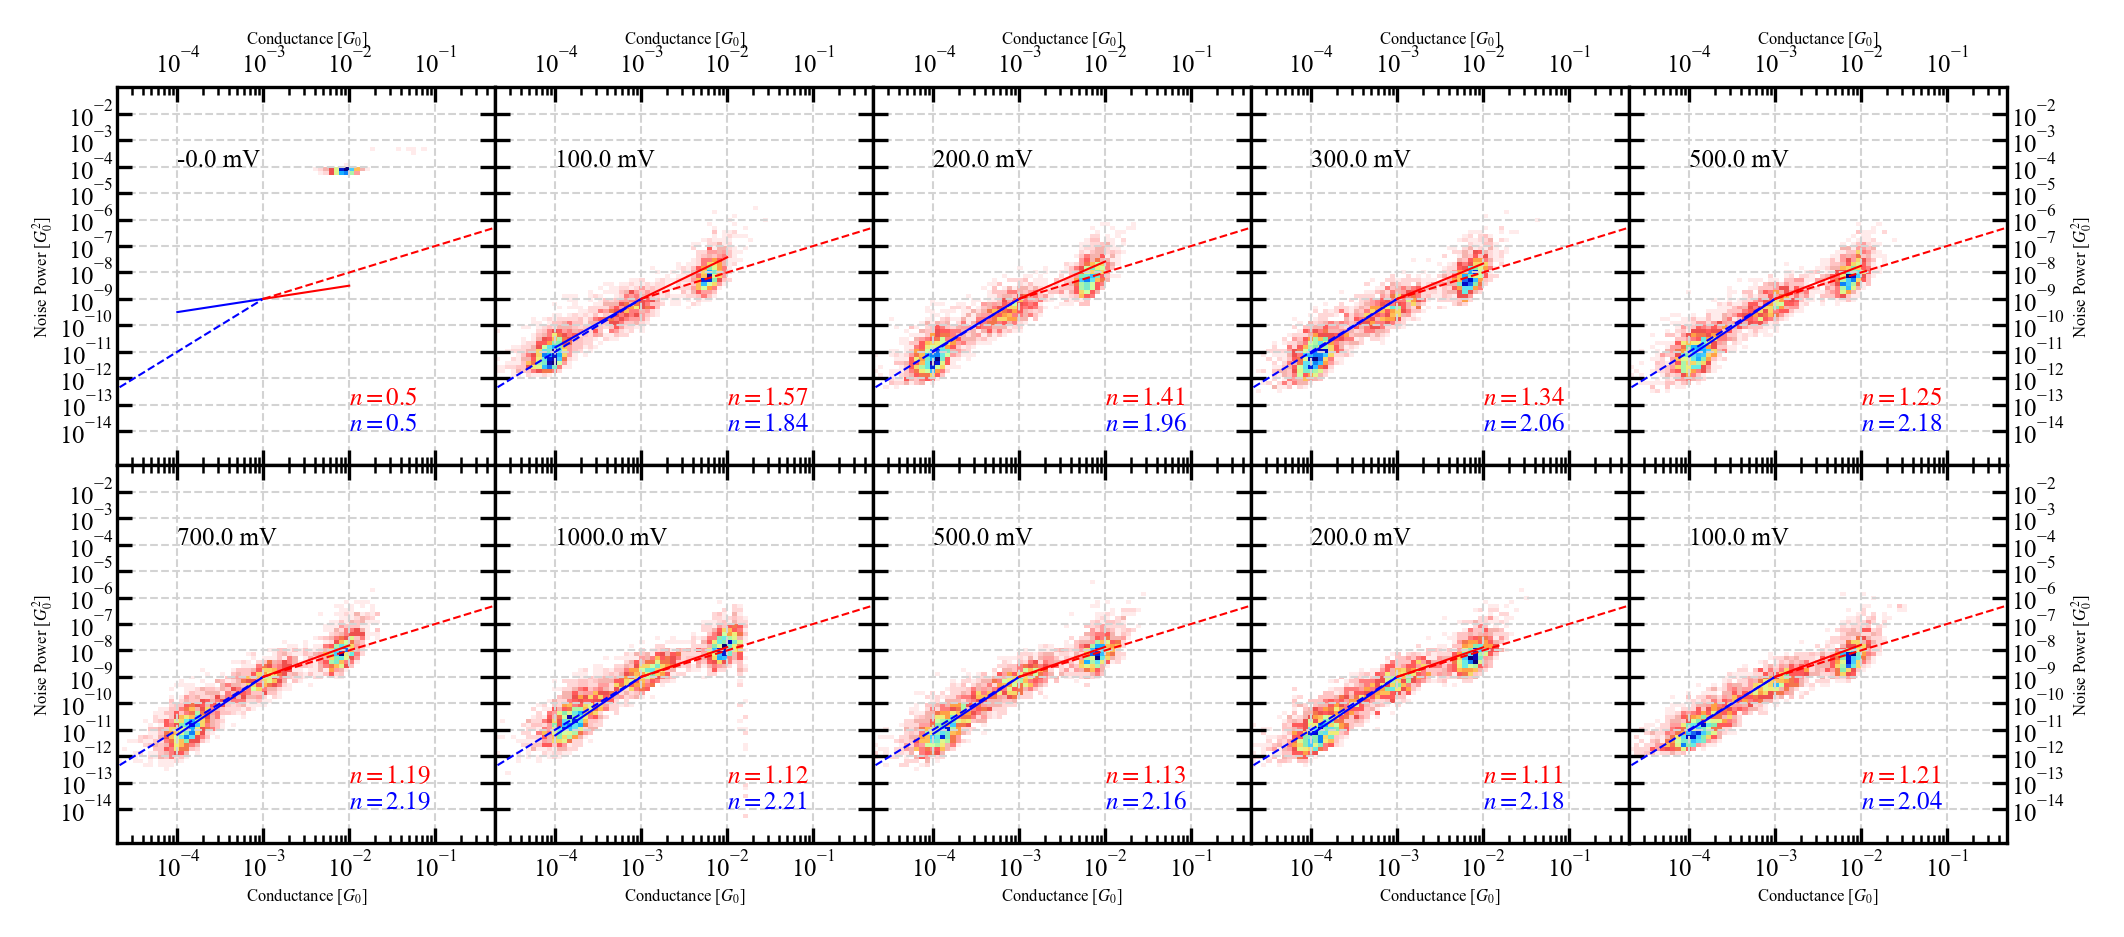

In [357]:
fig = plt.figure(figsize=utils.cm2inch(20, 8), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=5, width_ratios=(1, 1, 1, 1, 1), height_ratios=(1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0, hspace=0)
axs = []
hist_2d_noise_pow_all = []
n_push_low = np.zeros_like(bias_steps)
n_push_high = np.zeros_like(bias_steps)

for i in tqdm(range(10)):
    axs.append(fig.add_subplot(gs[i//5, i%5]))
    
    axs[i].set_xlim(2e-5, 0.5)
    axs[i].set_ylim(5e-16, 0.1)
    
    if i//5==0:
        axs[i].xaxis.tick_top()
        axs[i].xaxis.set_label_position('top')
    if i%5 == 4:
        axs[i].yaxis.tick_right()
        axs[i].yaxis.set_label_position('right')
        
        axs[i].set_ylabel(r'Noise Power [$G^{2}_{0}$]', fontsize=4)
    if i%5 == 0:
        axs[i].set_ylabel(r'Noise Power [$G^{2}_{0}$]', fontsize=4)
    
    axs[i].set_xlabel(r'Conductance [$G_{0}$]', fontsize=4)
    axs[i].xaxis.set_ticks_position('both')
    axs[i].yaxis.set_ticks_position('both')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
    x_mesh, y_mesh, hist_2d_noise_power = utils.calc_hist_2d_single(x=noise_push_df[avg_cond_list[i]], y=noise_push_df[noise_pow_list[i]],
                                                                    xrange=(1e-5, 10), log_scale_x=True,
                                                                    yrange=(1e-16, 0.1), log_scale_y=True,
                                                                    num_bins=(100, 100),
                                                                    bin_mode_x='total',
                                                                    bin_mode_y='total')
    
    hist_2d_noise_pow_all.append(hist_2d_noise_power)
    
    axs[i].pcolormesh(x_mesh, y_mesh, hist_2d_noise_pow_all[i], cmap=utils.cmap_geo32)
    # axs[i].scatter(noise_push_df[avg_cond_list[i]], noise_push_df[noise_pow_list[i]], s=0.5, alpha=0.5, edgecolor='None')
    
    axs[i].plot(np.linspace(1e-5, 1e-3, 10), np.linspace(1e-5, 1e-3, 10)**2/1000, ls='--', lw=0.5, c='b', label='2')
    axs[i].plot(np.linspace(1e-3, 10, 10), np.linspace(1e-3, 10, 10)/1000000, ls='--', lw=0.5, c='r', label='1')
    
    axs[i].grid(c='lightgrey', ls='--', lw=0.5)
    
    axs[i].set_yticks(np.logspace(start=-14, stop=-2, num=13))
    axs[i].text(1e-4, 1e-4, f'{np.round(bias_steps[i]*1000)} mV', fontsize=6)
    
    N, corr, n_push_low[i] = calc_correlation(noise_push_df[avg_cond_list[i]], noise_push_df[noise_pow_list[i]], cond_range=(1e-4, 1e-3))
    N, corr, n_push_high[i] = calc_correlation(noise_push_df[avg_cond_list[i]], noise_push_df[noise_pow_list[i]], cond_range=(1e-3, 1e-2))
    
    axs[i].text(1e-2, 1e-14, f'$n={np.around(n_push_low[i], 2)}$', c='b', fontsize=6)
    axs[i].text(1e-2, 1e-13, f'$n={np.around(n_push_high[i], 2)}$', c='r', fontsize=6)
    
    axs[i].plot(np.linspace(1e-4, 1e-3, 10), np.linspace(1e-4, 1e-3, 10)**n_push_low[i]/(np.linspace(1e-4, 1e-3, 10)**n_push_low[i])[-1]*1e-9, ls='-', c='b', lw=0.5)
    axs[i].plot(np.linspace(1e-3, 1e-2, 10), np.linspace(1e-3, 1e-2, 10)**n_push_high[i]/(np.linspace(1e-3, 1e-2, 10)**n_push_high[i])[0]*1e-9, ls='-', c='r', lw=0.5)
    
    if i%5!=0 and i%5!=4:
        axs[i].set_yticklabels(['']*len(axs[i].get_yticks()))

  0%|          | 0/10 [00:00<?, ?it/s]

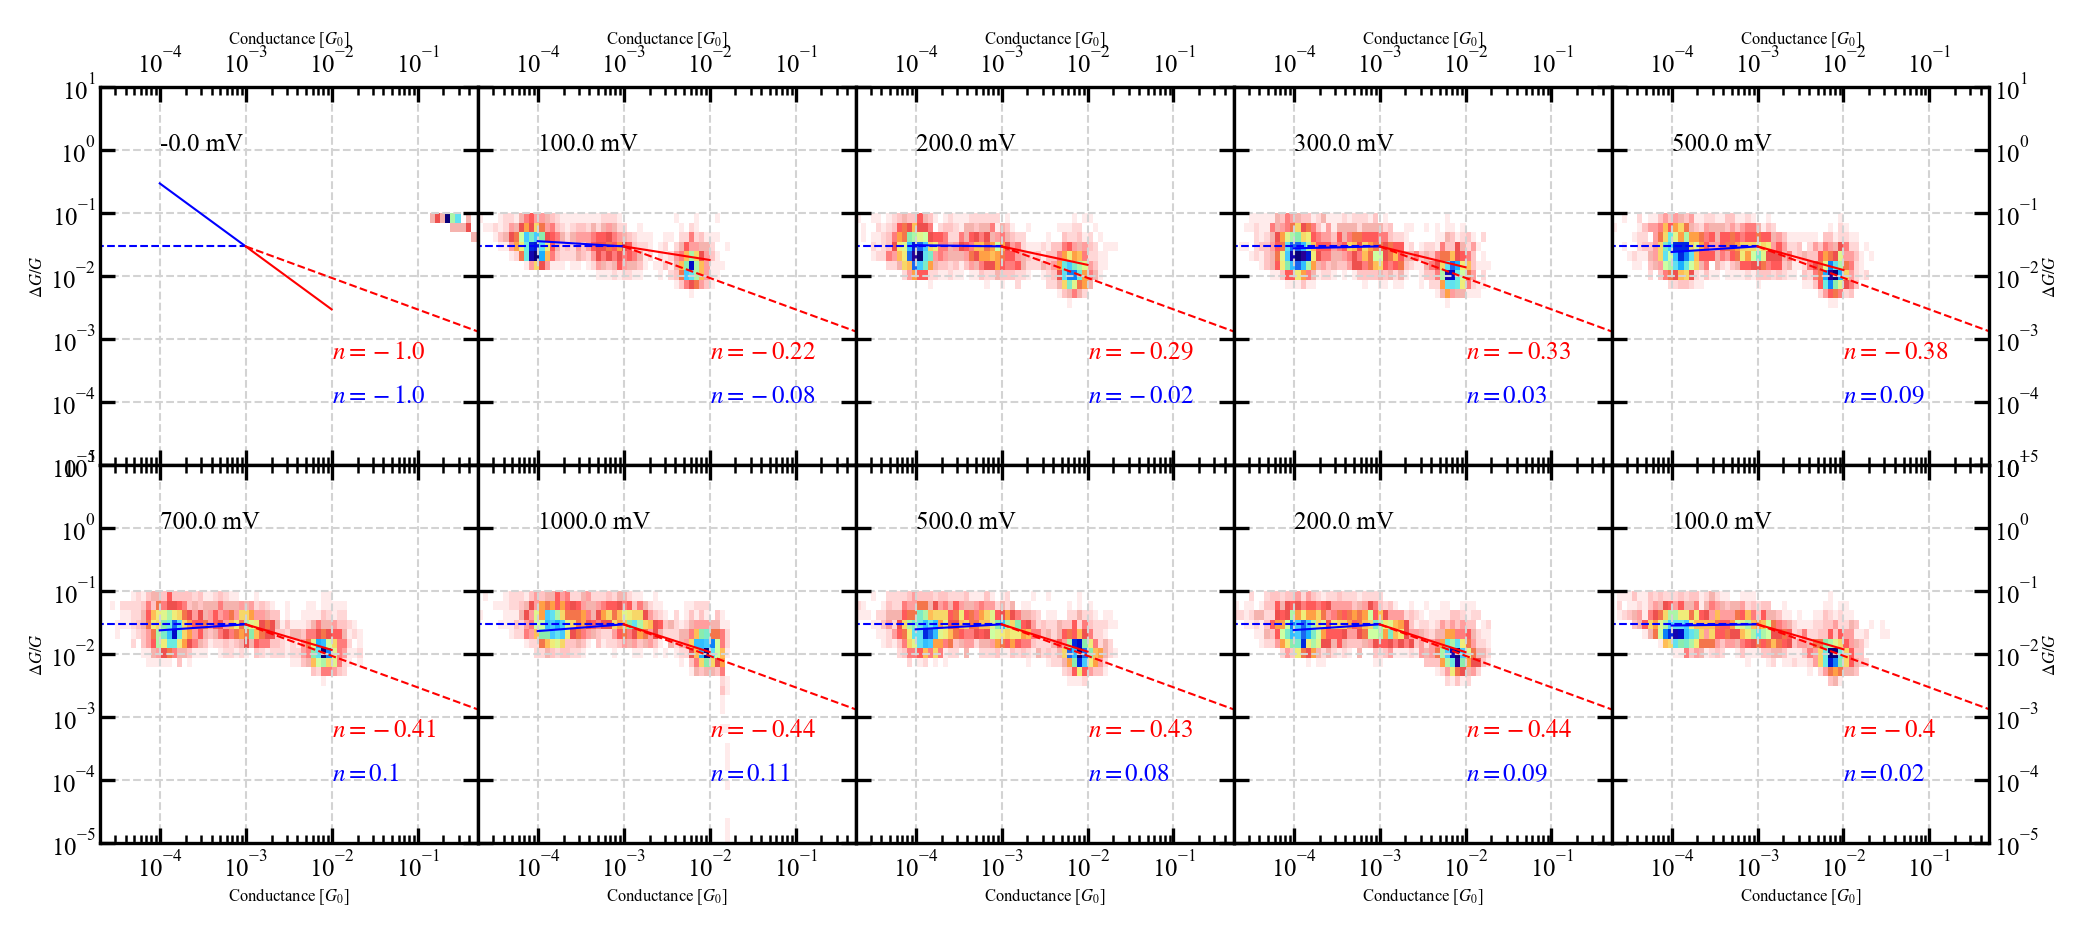

In [358]:
fig = plt.figure(figsize=utils.cm2inch(20, 8), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=5, width_ratios=(1, 1, 1, 1, 1), height_ratios=(1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0, hspace=0)
axs = []
hist_2d_cond_noise_all = []
n_push_low = np.zeros_like(bias_steps)
n_push_high = np.zeros_like(bias_steps)

for i in tqdm(range(10)):
    axs.append(fig.add_subplot(gs[i//5, i%5]))
    
    axs[i].set_xlim(2e-5, 0.5)
    axs[i].set_ylim(1e-3, 10)
    
    if i//5==0:
        axs[i].xaxis.tick_top()
        axs[i].xaxis.set_label_position('top')
    if i%5 == 4:
        axs[i].yaxis.tick_right()
        axs[i].yaxis.set_label_position('right')
        
        axs[i].set_ylabel(r'$\Delta G / G$', fontsize=4)
    if i%5 == 0:
        axs[i].set_ylabel(r'$\Delta G / G$', fontsize=4)
    
    axs[i].set_xlabel(r'Conductance [$G_{0}$]', fontsize=4)
    axs[i].xaxis.set_ticks_position('both')
    axs[i].yaxis.set_ticks_position('both')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
    x_mesh, y_mesh, hist_2d_cond_noise = utils.calc_hist_2d_single(x=noise_push_df[avg_cond_list[i]], y=noise_push_df[cond_noise_list[i]],
                                                                    xrange=(1e-5, 10), log_scale_x=True,
                                                                    yrange=(1e-16, 0.1), log_scale_y=True,
                                                                    num_bins=(100, 100),
                                                                    bin_mode_x='total',
                                                                    bin_mode_y='total')
    
    hist_2d_cond_noise_all.append(hist_2d_cond_noise)
    
    axs[i].pcolormesh(x_mesh, y_mesh, hist_2d_cond_noise_all[i], cmap=utils.cmap_geo32)
    # axs[i].scatter(noise_push_df[avg_cond_list[i]], noise_push_df[noise_pow_list[i]], s=0.5, alpha=0.5, edgecolor='None')
    
    axs[i].plot(np.linspace(1e-5, 1e-3, 10), np.linspace(1e-5, 1e-3, 10)**0/(np.linspace(1e-5, 1e-3, 10)**0)[-1]*3e-2, ls='--', c='b', lw=0.5)
    axs[i].plot(np.linspace(1e-3, 10, 10), np.linspace(1e-3, 10, 10)**(-0.5)/(np.linspace(1e-3, 10, 10)**(-0.5))[0]*3e-2, ls='--', c='r', lw=0.5)
    
    axs[i].grid(c='lightgrey', ls='--', lw=0.5)
    
    axs[i].set_yticks(np.logspace(start=-5, stop=1, num=7))
    axs[i].text(1e-4, 1, f'{np.round(bias_steps[i]*1000)} mV', fontsize=6)
    
    N, corr, n_push_low[i] = calc_correlation(noise_push_df[avg_cond_list[i]],
                                              noise_push_df[cond_noise_list[i]],
                                              cond_range=(1e-4, 1e-3), N = np.linspace(-1, 1, num=1000))
    N, corr, n_push_high[i] = calc_correlation(noise_push_df[avg_cond_list[i]],
                                               noise_push_df[cond_noise_list[i]],
                                               cond_range=(1e-3, 1e-2), N = np.linspace(-1, 1, num=1000))
    
    axs[i].text(1e-2, 1e-4, f'$n={np.around(n_push_low[i], 2)}$', c='b', fontsize=6)
    axs[i].text(1e-2, 5e-4, f'$n={np.around(n_push_high[i], 2)}$', c='r', fontsize=6)
    
    axs[i].plot(np.linspace(1e-4, 1e-3, 10), np.linspace(1e-4, 1e-3, 10)**n_push_low[i]/(np.linspace(1e-4, 1e-3, 10)**n_push_low[i])[-1]*3e-2, ls='-', c='b', lw=0.5)
    axs[i].plot(np.linspace(1e-3, 1e-2, 10), np.linspace(1e-3, 1e-2, 10)**n_push_high[i]/(np.linspace(1e-3, 1e-2, 10)**n_push_high[i])[0]*3e-2, ls='-', c='r', lw=0.5)
    
    if i%5!=0 and i%5!=4:
        axs[i].set_yticklabels(['']*len(axs[i].get_yticks()))

In [376]:
np.unique(conductance_stat_df.G_set.to_numpy())

array([0.0005, 0.001 , 0.005 , 0.01  , 0.05  ])

# 1D histogram and PCA with lower conductance limit 0.05 $G_0$

In [40]:
hist_BPY_hold_lim_100 = Histogram(folder=home_folder,
                              traces=after_evap_w_hold,
                              conductance_range=(5e-2, 10),
                              conductance_log_scale=True,
                              conductance_bins_num=100,
                              conductance_bins_mode='total')

In [41]:
hist_BPY_hold_lim_100.calc_stats(align_at=0.5,
                             range_pull=(-1, 1),
                             range_push=(-0.5, 1.5))

  0%|          | 0/30269 [00:00<?, ?it/s]

Pull 2D histogram created from 30269 traces
Push 2D histogram created from 30269 traces


(0.0, 2000.0)

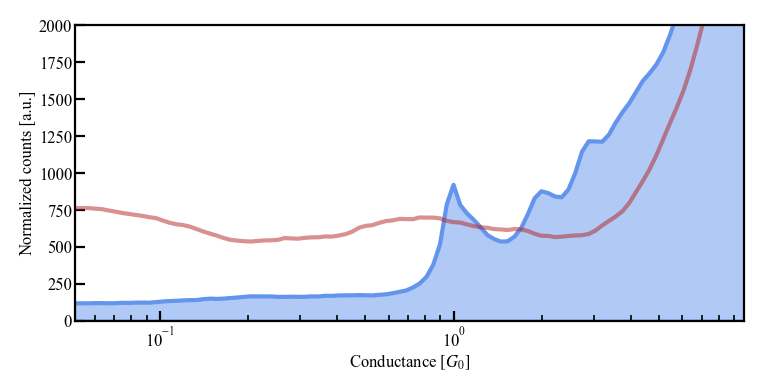

In [42]:
ax_hist_BPY_hold_lim_100 = hist_BPY_hold_lim_100.plot_hist_1d(dpi=200)
ax_hist_BPY_hold_lim_100.set_ylim(0, 2000)

In [43]:
hist_BPY_hold_lim_100.calc_corr_hist_2d()

  0%|          | 0/30269 [00:00<?, ?it/s]

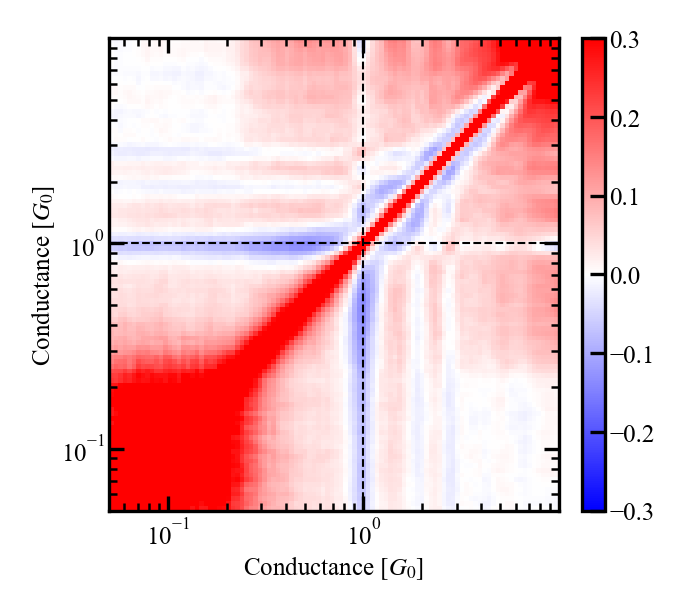

In [44]:
ax_corr, ax_cbar = hist_BPY_hold_lim_100.plot_corr(mode='pull', dpi=300, vmin=-0.3, vmax=0.3)
ax_corr.axhline(1, ls='--', lw=0.5, c='k')
ax_corr.axvline(1, ls='--', lw=0.5, c='k')

In [131]:
hist_BPY_hold_lim_100.save_histogram(fname=home_folder.joinpath('results/hist_BPY_hold_lim_100.h5'))

Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\results\hist_BPY_hold_lim_100.h5.


In [45]:
pc_BPY_hold_lim_100 = PCA(hist=hist_BPY_hold_lim_100, num_of_pcs=5)
pc_BPY_hold_lim_100.calc_principal_components(direction='pull')

pc_BPY_hold_lim_100.project_to_pcs()
pc_BPY_hold_lim_100.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc_BPY_hold_lim_100.select_percentage(percentage=20, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

(0.05, 10.01)

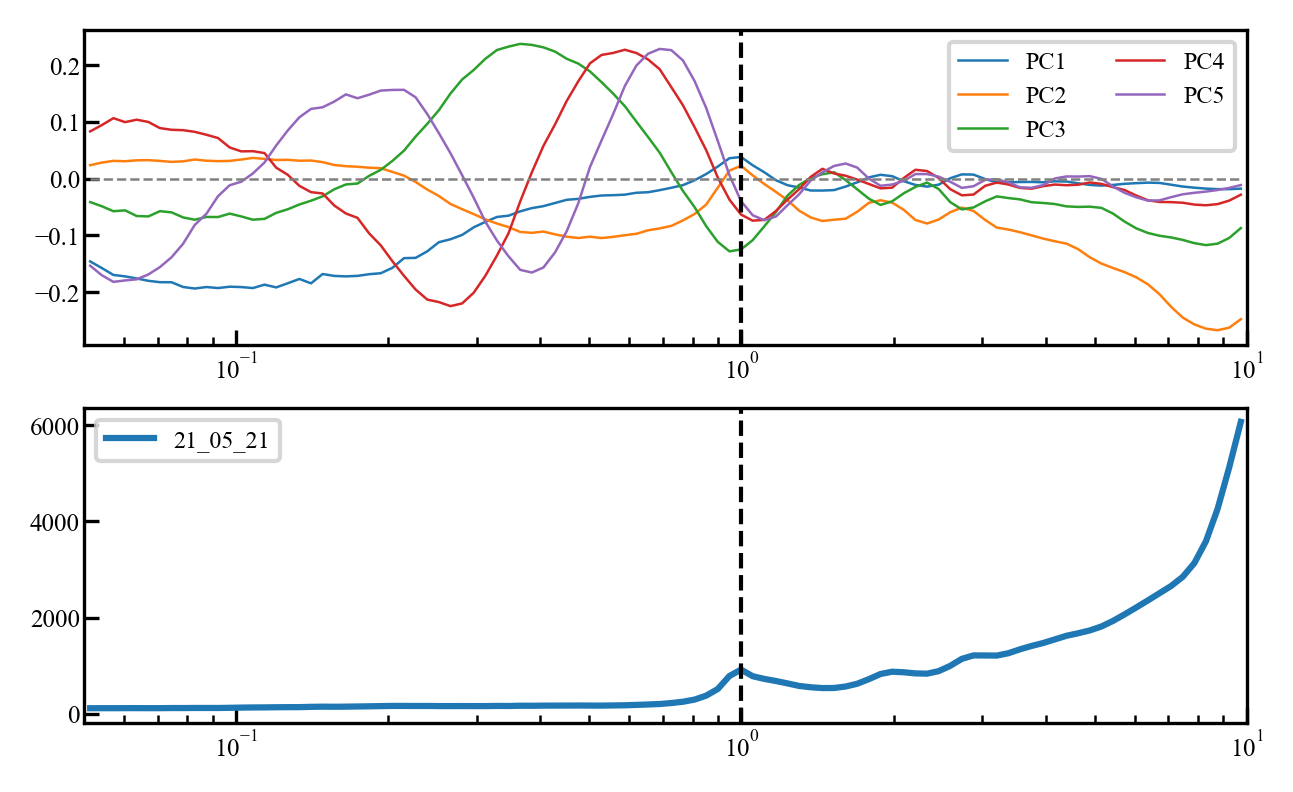

In [46]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc_BPY_hold_lim_100.plot_pcs(ax=ax1)
ax1.set_xscale('log')
ax2.plot(hist_BPY_hold_lim_100.hist_1d_bins, hist_BPY_hold_lim_100.hist_1d_pull, label='21_05_21')
ax2.set_xscale('log')
ax1.axvline(1, ls='--', lw=1, c='k')
ax2.axvline(1, ls='--', lw=1, c='k')
ax2.legend(fontsize='xx-small')
ax1.set_xlim(5e-2, 10.01)
ax2.set_xlim(5e-2, 10.01)

array([<AxesSubplot:title={'center':'PC1'}>,
       <AxesSubplot:title={'center':'PC2'}>,
       <AxesSubplot:title={'center':'PC3'}>,
       <AxesSubplot:title={'center':'PC4'}>,
       <AxesSubplot:title={'center':'PC5'}>], dtype=object)

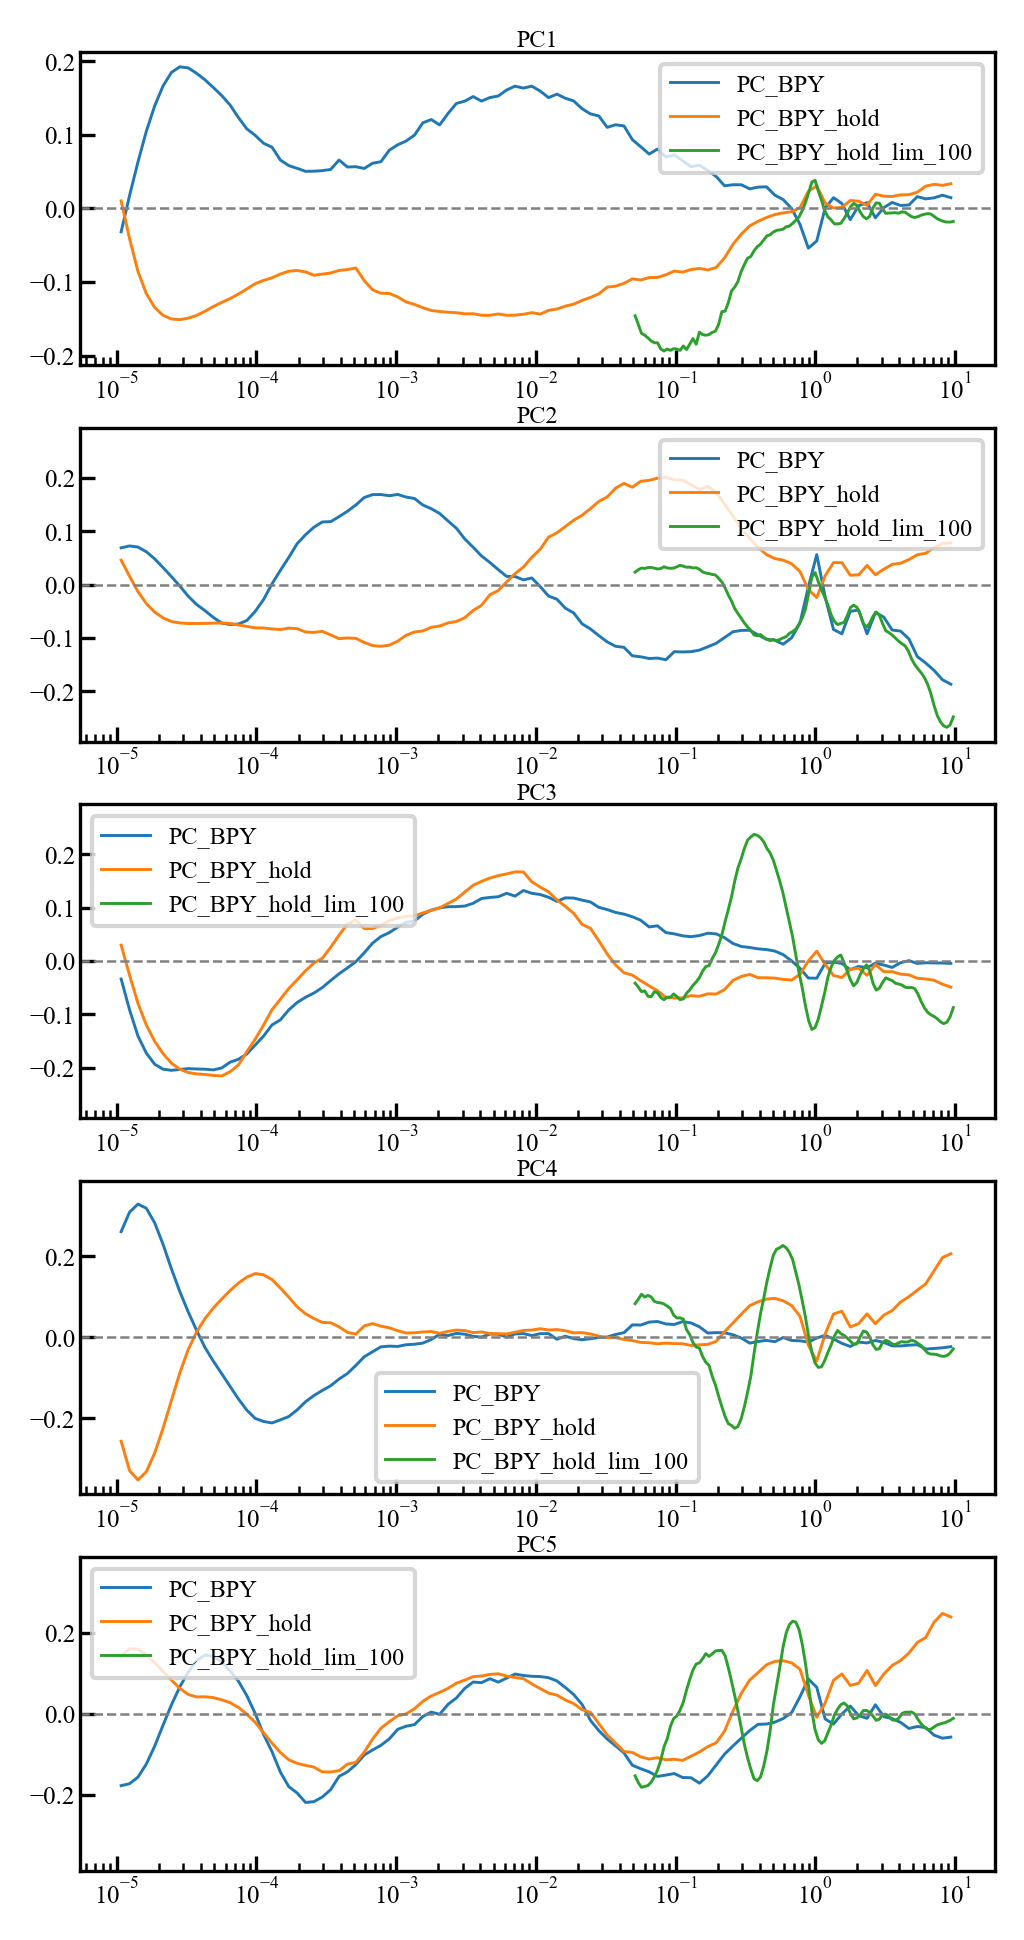

In [47]:
compare_principal_components(pcs=(pc_BPY, pc_BPY_hold, pc_BPY_hold_lim_100), labels=('PC_BPY', 'PC_BPY_hold', 'PC_BPY_hold_lim_100'), lw=0.7)

In [48]:
hist_BPY_hold_lim_40 = Histogram(folder=home_folder,
                                  traces=after_evap_w_hold,
                                  conductance_range=(5e-2, 10),
                                  conductance_log_scale=True,
                                  conductance_bins_num=40,
                                  conductance_bins_mode='total')

In [49]:
hist_BPY_hold_lim_40.calc_stats(align_at=0.5,
                                 range_pull=(-1, 1),
                                 range_push=(-0.5, 1.5))

  0%|          | 0/30269 [00:00<?, ?it/s]

Pull 2D histogram created from 30269 traces
Push 2D histogram created from 30269 traces


(0.0, 2000.0)

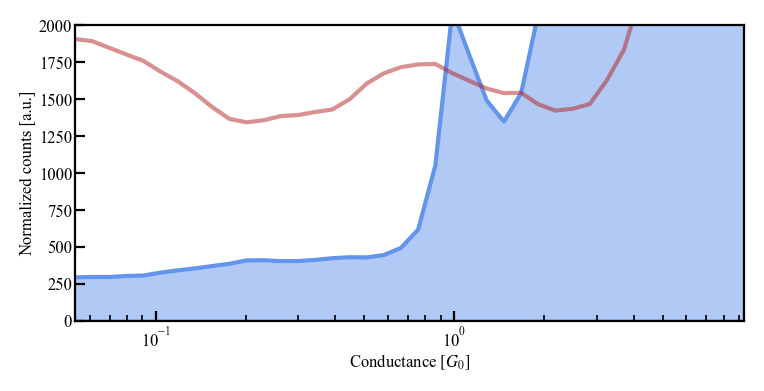

In [50]:
ax_hist_BPY_hold_lim_40 = hist_BPY_hold_lim_40.plot_hist_1d(dpi=200)
ax_hist_BPY_hold_lim_40.set_ylim(0, 2000)

In [51]:
hist_BPY_hold_lim_40.calc_corr_hist_2d()

  0%|          | 0/30269 [00:00<?, ?it/s]

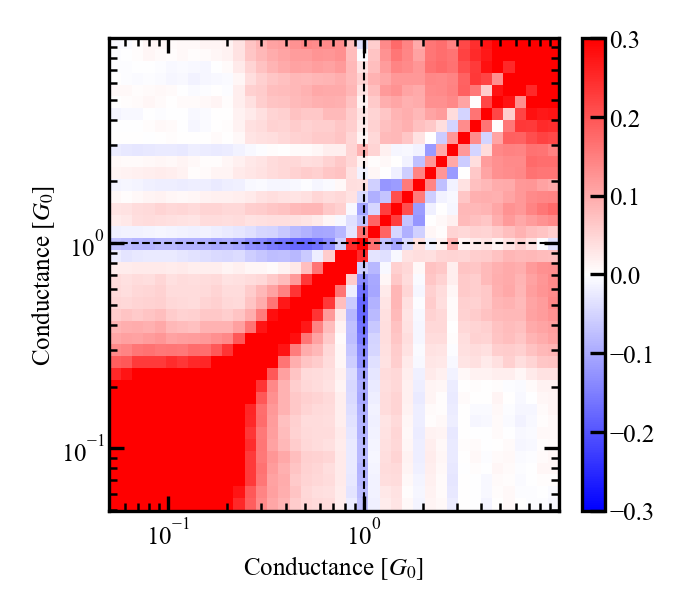

In [52]:
ax_corr, ax_cbar = hist_BPY_hold_lim_40.plot_corr(mode='pull', dpi=300, vmin=-0.3, vmax=0.3)
ax_corr.axhline(1, ls='--', lw=0.5, c='k')
ax_corr.axvline(1, ls='--', lw=0.5, c='k')

In [130]:
hist_BPY_hold_lim_40.save_histogram(fname=home_folder.joinpath('results/hist_BPY_hold_lim_40.h5'))

Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\results\hist_BPY_hold_lim_40.h5.


In [54]:
pc_BPY_hold_lim_40 = PCA(hist=hist_BPY_hold_lim_40, num_of_pcs=5)
pc_BPY_hold_lim_40.calc_principal_components(direction='pull')

pc_BPY_hold_lim_40.project_to_pcs()
pc_BPY_hold_lim_40.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc_BPY_hold_lim_40.select_percentage(percentage=20, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

(0.05, 10.01)

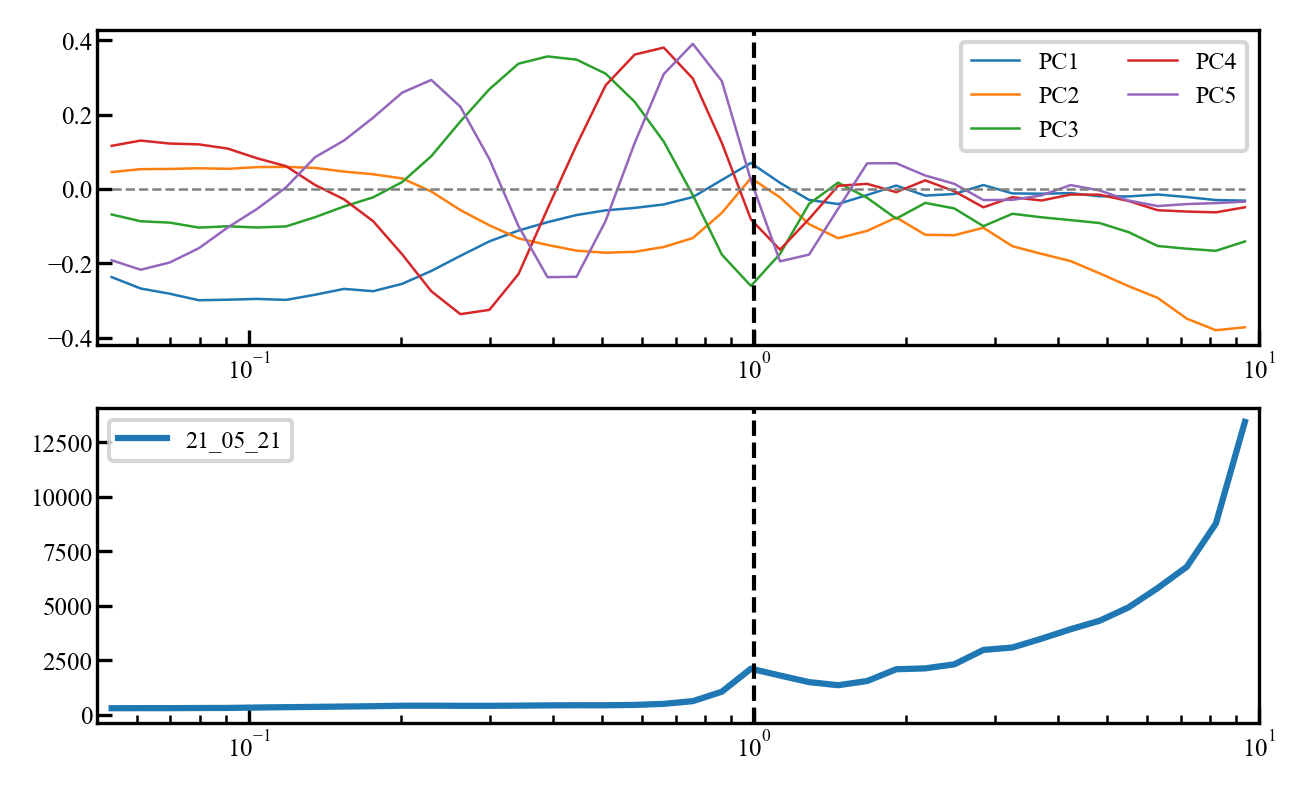

In [56]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc_BPY_hold_lim_40.plot_pcs(ax=ax1)
ax1.set_xscale('log')
ax2.plot(hist_BPY_hold_lim_40.hist_1d_bins, hist_BPY_hold_lim_40.hist_1d_pull, label='21_05_21')
ax2.set_xscale('log')
ax1.axvline(1, ls='--', lw=1, c='k')
ax2.axvline(1, ls='--', lw=1, c='k')
ax2.legend(fontsize='xx-small')
ax1.set_xlim(5e-2, 10.01)
ax2.set_xlim(5e-2, 10.01)

array([<AxesSubplot:title={'center':'PC1'}>,
       <AxesSubplot:title={'center':'PC2'}>,
       <AxesSubplot:title={'center':'PC3'}>,
       <AxesSubplot:title={'center':'PC4'}>,
       <AxesSubplot:title={'center':'PC5'}>], dtype=object)

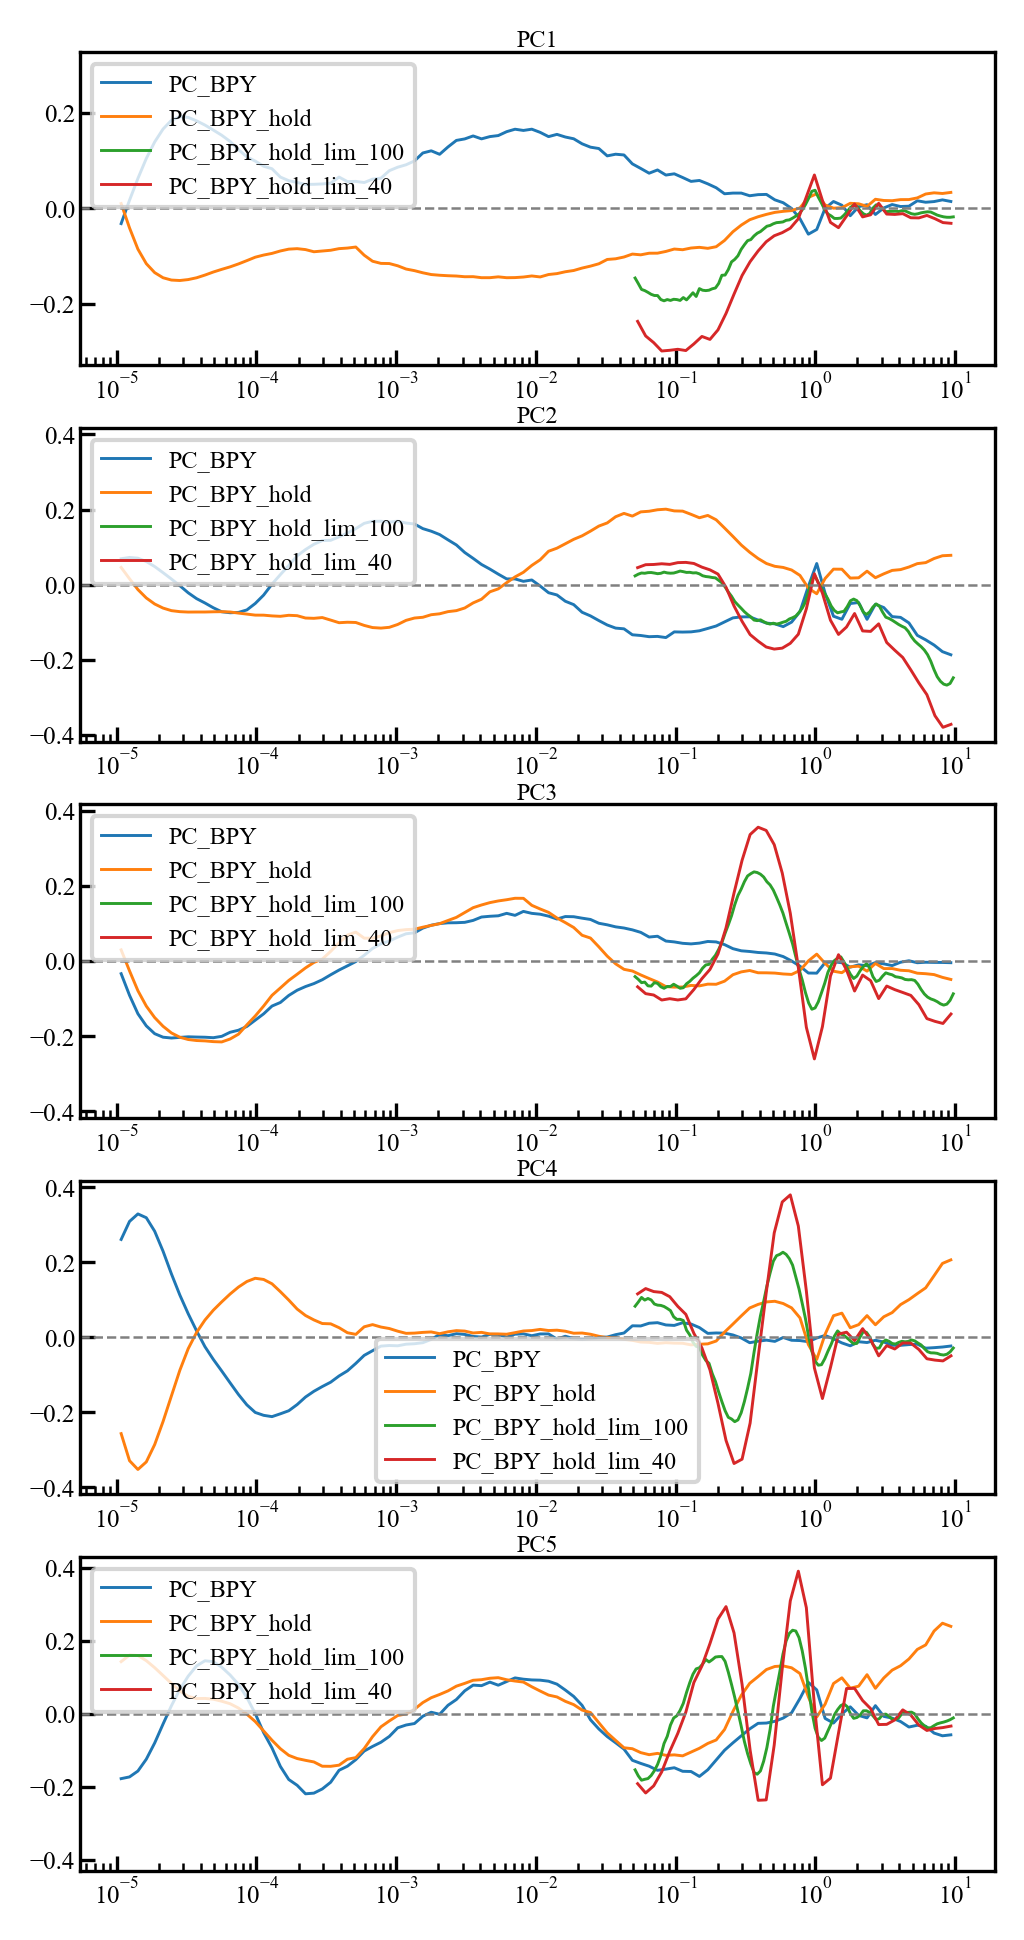

In [57]:
compare_principal_components(pcs=(pc_BPY, pc_BPY_hold, pc_BPY_hold_lim_100, pc_BPY_hold_lim_40), labels=('PC_BPY', 'PC_BPY_hold', 'PC_BPY_hold_lim_100', 'PC_BPY_hold_lim_40'), lw=0.7)

In [61]:
pc_BPY_hold_lim_40.calc_group_histograms(chosen_pc=('PC1', ),
                                         conductance_range=(1e-5, 10),
                                         conductance_bins_num=100,
                                         conductance_log_scale=True,
                                         conductance_bins_mode='total')

Calculating 1D and 2D histograms of PC1 group1.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC1 group2.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces


In [64]:
pc_BPY_hold_lim_40.calc_group_histograms(chosen_pc=('PC2', ),
                                         conductance_range=(1e-5, 10),
                                         conductance_bins_num=100,
                                         conductance_log_scale=True,
                                         conductance_bins_mode='total')

Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces


In [65]:
pc_BPY_hold_lim_40.calc_group_histograms(chosen_pc=('PC3', ),
                                         conductance_range=(1e-5, 10),
                                         conductance_bins_num=100,
                                         conductance_log_scale=True,
                                         conductance_bins_mode='total')

Calculating 1D and 2D histograms of PC3 group1.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC3 group2.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces


In [66]:
pc_BPY_hold_lim_40.calc_group_histograms(chosen_pc=('PC4', ),
                                         conductance_range=(1e-5, 10),
                                         conductance_bins_num=100,
                                         conductance_log_scale=True,
                                         conductance_bins_mode='total')

Calculating 1D and 2D histograms of PC4 group1.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC4 group2.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces


In [67]:
pc_BPY_hold_lim_40.calc_group_histograms(chosen_pc=('PC5', ),
                                         conductance_range=(1e-5, 10),
                                         conductance_bins_num=100,
                                         conductance_log_scale=True,
                                         conductance_bins_mode='total')

Calculating 1D and 2D histograms of PC5 group1.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces
Calculating 1D and 2D histograms of PC5 group2.


  0%|          | 0/6053 [00:00<?, ?it/s]

  0%|          | 0/6053 [00:00<?, ?it/s]

2D histogram pull direction created from 6053 traces
2D histogram push direction created from 6053 traces


In [136]:
pc_BPY_hold_lim_40.save_principal_components(fname=home_folder.joinpath('results/pc_BPY_hold_lim_40.h5'), save_trace_hists=True)

Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_total_for_pc_BPY_hold_lim_40.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_hold_lim_40_PC1.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group2_for_pc_BPY_hold_lim_40_PC1.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_hold_lim_40_PC2.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group2_for_pc_BPY_hold_lim_40_PC2.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_hold_lim_40_PC3.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group2_for_pc_BPY_hold_lim_40_PC3.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_hold_lim_40_PC4.h

array([<AxesSubplot:title={'center':'PC1'}>,
       <AxesSubplot:title={'center':'PC2'}>,
       <AxesSubplot:title={'center':'PC3'}>,
       <AxesSubplot:title={'center':'PC4'}>,
       <AxesSubplot:title={'center':'PC5'}>], dtype=object)

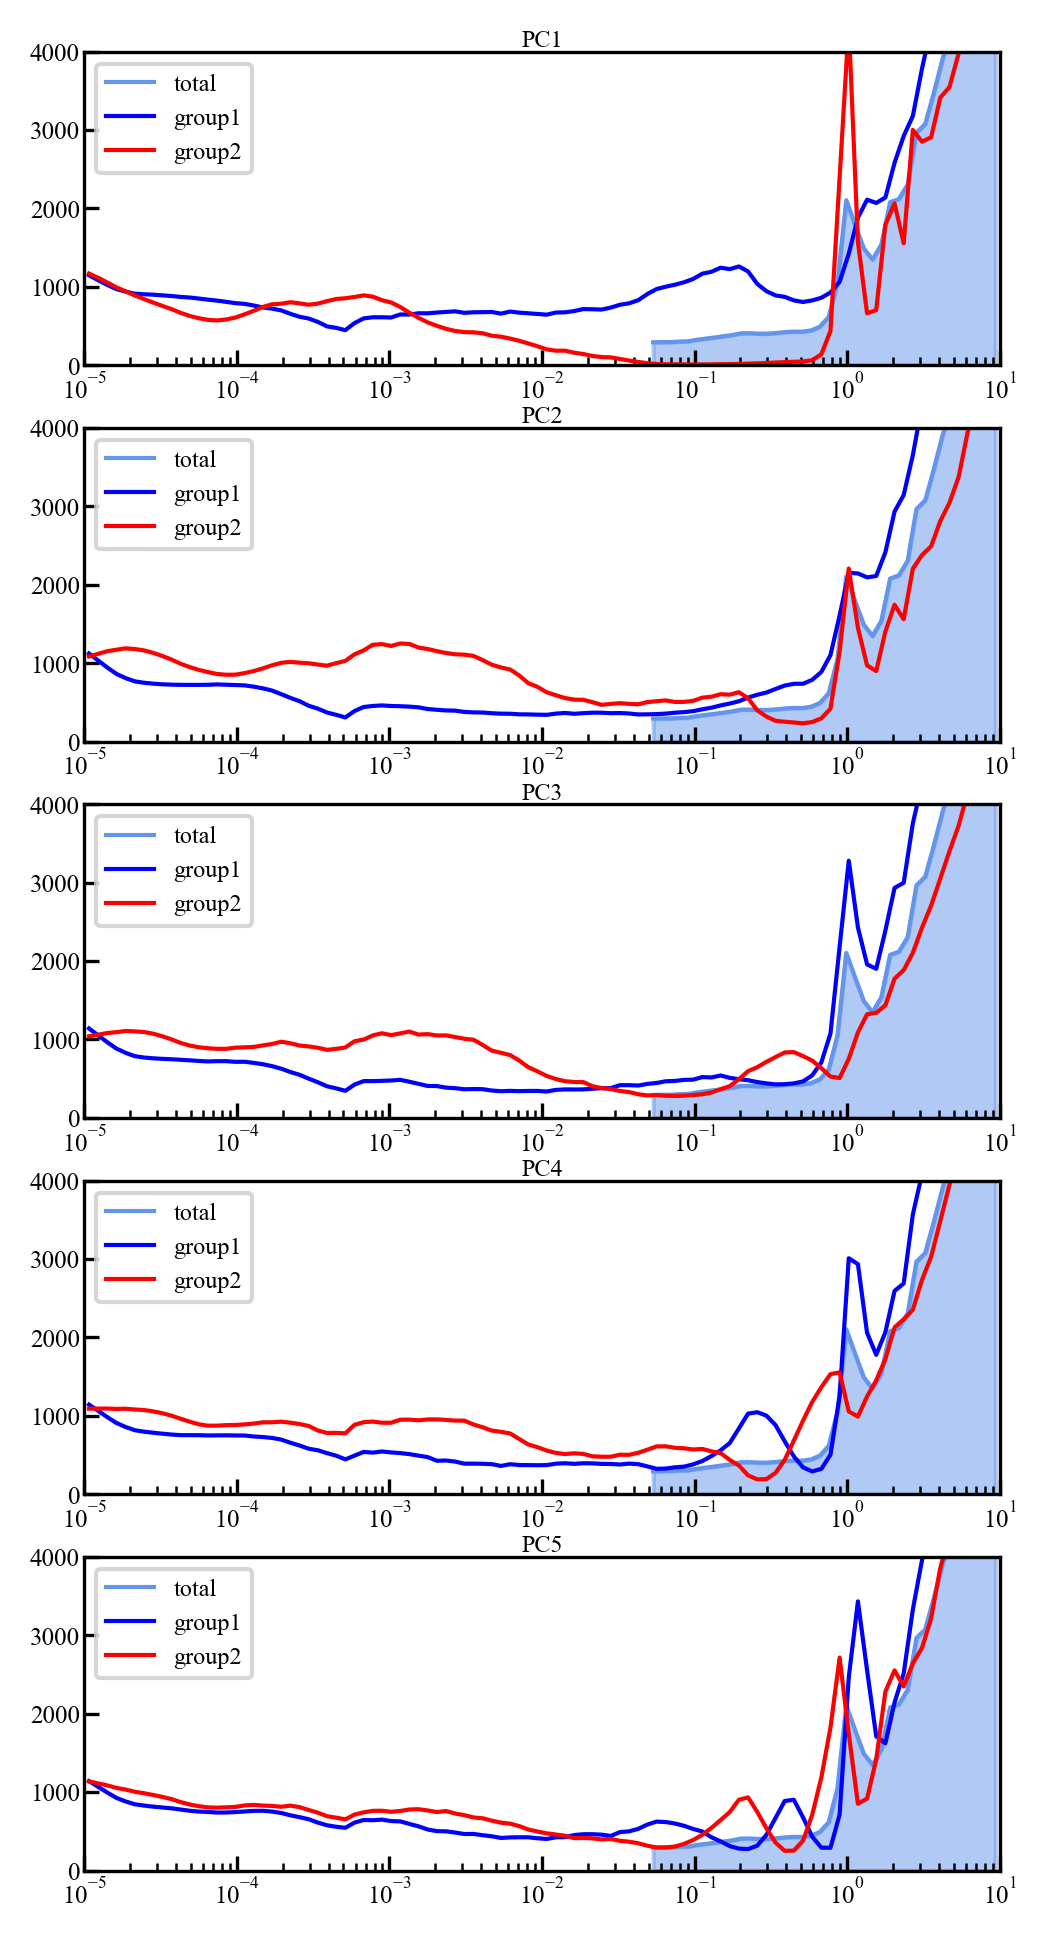

In [68]:
pc_BPY_hold_lim_40.plot_group_histograms_1d(ylims=(0, 4000))

In [69]:
hist_BPY_lim_40 = Histogram(folder=home_folder,
                            traces=after_evap_no_hold,
                            conductance_range=(5e-2, 10),
                            conductance_log_scale=True,
                            conductance_bins_num=40,
                            conductance_bins_mode='total')

In [70]:
hist_BPY_lim_40.calc_stats(align_at=0.5,
                           range_pull=(-1, 1),
                           range_push=(-0.5, 1.5))

  0%|          | 0/12623 [00:00<?, ?it/s]

Pull 2D histogram created from 12623 traces
Push 2D histogram created from 12623 traces


(0.0, 2000.0)

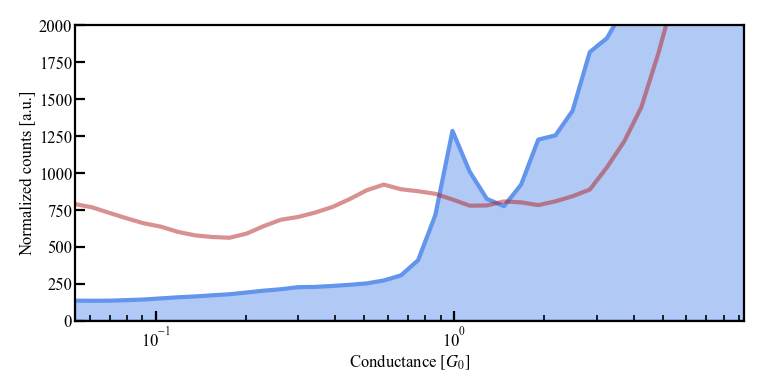

In [71]:
ax_hist_BPY_lim_40 = hist_BPY_lim_40.plot_hist_1d(dpi=200)
ax_hist_BPY_lim_40.set_ylim(0, 2000)

In [72]:
hist_BPY_lim_40.calc_corr_hist_2d()

  0%|          | 0/12623 [00:00<?, ?it/s]

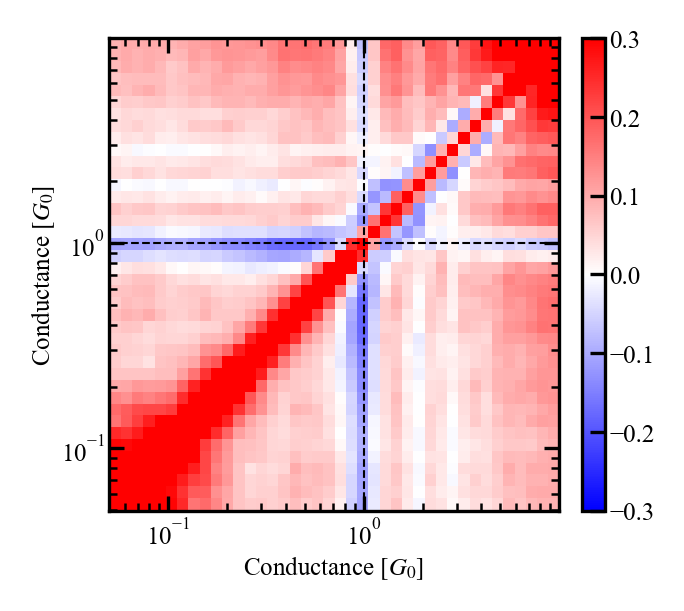

In [73]:
ax_corr, ax_cbar = hist_BPY_lim_40.plot_corr(mode='pull', dpi=300, vmin=-0.3, vmax=0.3)
ax_corr.axhline(1, ls='--', lw=0.5, c='k')
ax_corr.axvline(1, ls='--', lw=0.5, c='k')

In [129]:
hist_BPY_lim_40.save_histogram(fname=home_folder.joinpath('results/hist_BPY_lim_40.h5'))

Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\results\hist_BPY_lim_40.h5.


In [74]:
pc_BPY_lim_40 = PCA(hist=hist_BPY_lim_40, num_of_pcs=5)
pc_BPY_lim_40.calc_principal_components(direction='pull')

pc_BPY_lim_40.project_to_pcs()
pc_BPY_lim_40.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc_BPY_lim_40.select_percentage(percentage=20, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

(0.05, 10.01)

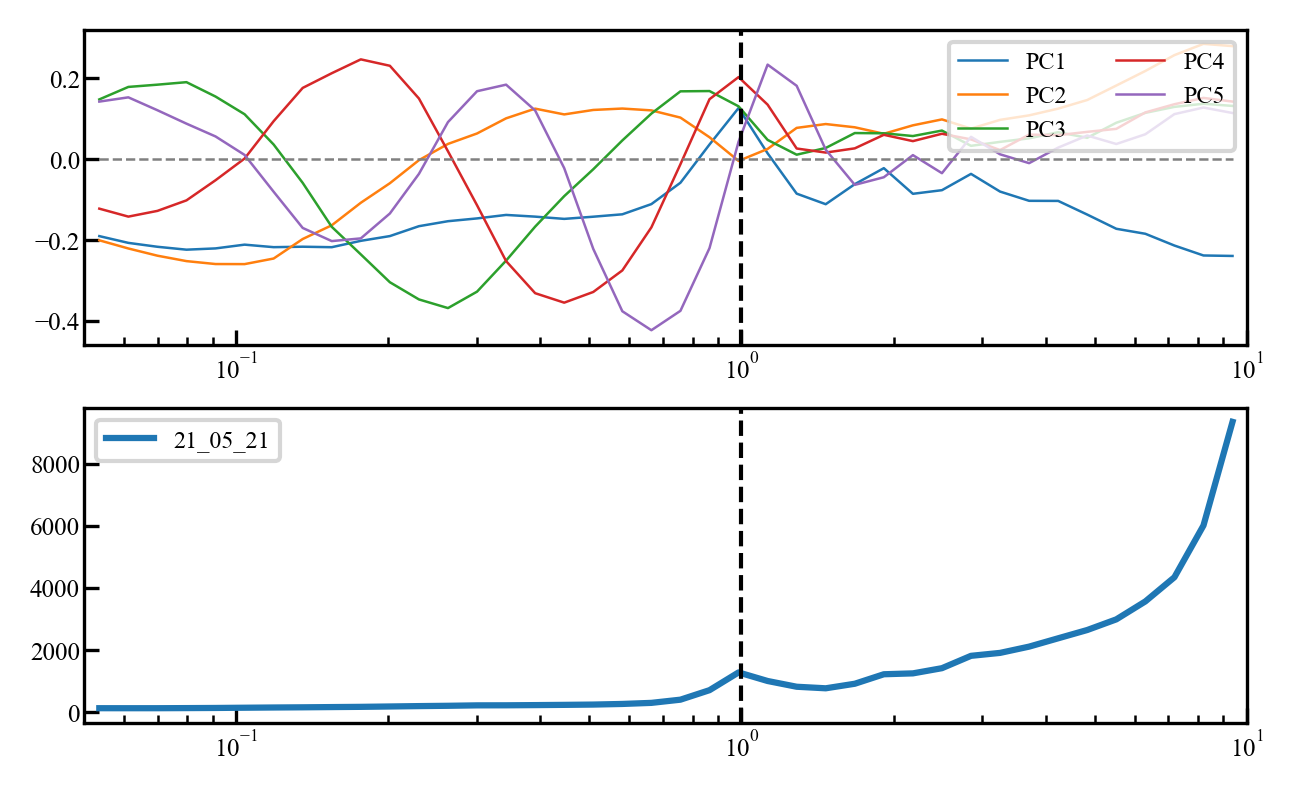

In [75]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc_BPY_lim_40.plot_pcs(ax=ax1)
ax1.set_xscale('log')
ax2.plot(hist_BPY_hold_lim_40.hist_1d_bins, hist_BPY_lim_40.hist_1d_pull, label='21_05_21')
ax2.set_xscale('log')
ax1.axvline(1, ls='--', lw=1, c='k')
ax2.axvline(1, ls='--', lw=1, c='k')
ax2.legend(fontsize='xx-small')
ax1.set_xlim(5e-2, 10.01)
ax2.set_xlim(5e-2, 10.01)

array([<AxesSubplot:title={'center':'PC1'}>,
       <AxesSubplot:title={'center':'PC2'}>,
       <AxesSubplot:title={'center':'PC3'}>,
       <AxesSubplot:title={'center':'PC4'}>,
       <AxesSubplot:title={'center':'PC5'}>], dtype=object)

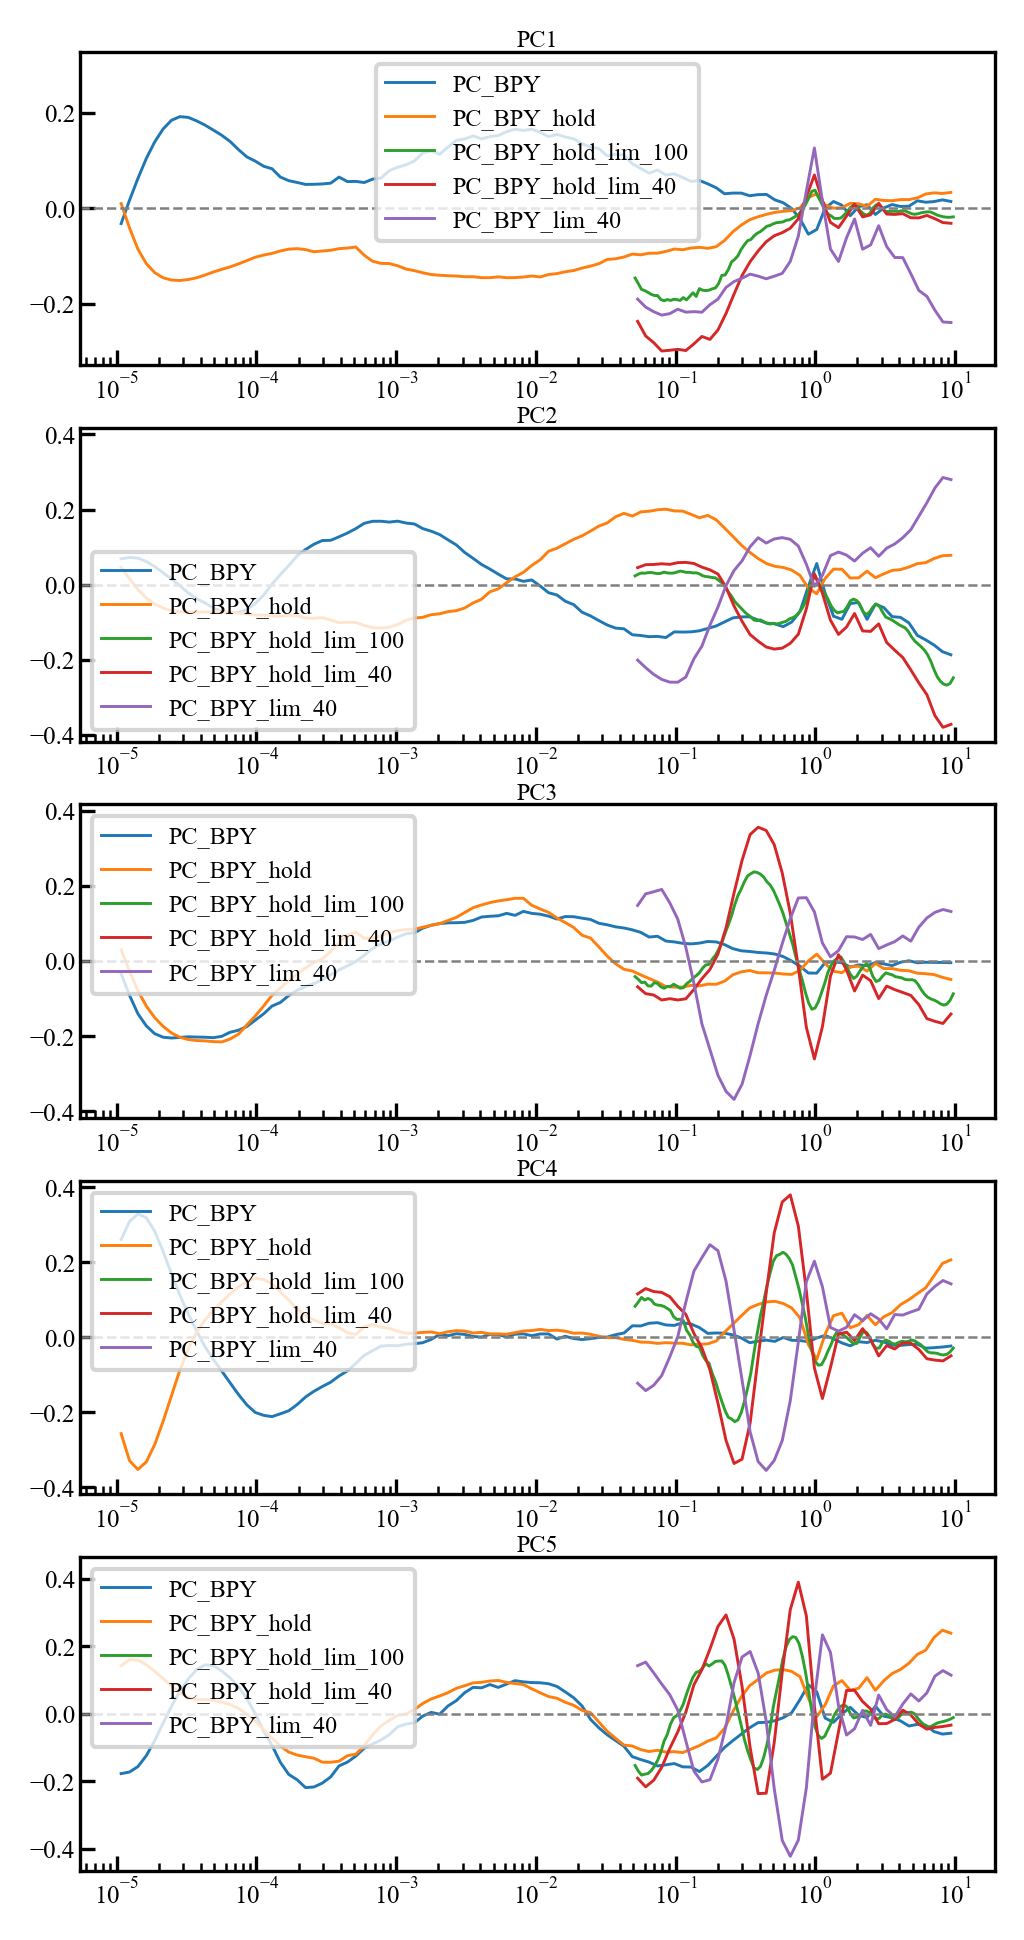

In [76]:
compare_principal_components(pcs=(pc_BPY, pc_BPY_hold, pc_BPY_hold_lim_100, pc_BPY_hold_lim_40, pc_BPY_lim_40), labels=('PC_BPY', 'PC_BPY_hold', 'PC_BPY_hold_lim_100', 'PC_BPY_hold_lim_40', 'PC_BPY_lim_40'), lw=0.7)

In [137]:
pc_BPY_lim_40.calc_group_histograms(conductance_range=(1e-5, 10),
                                    conductance_bins_num=100,
                                    conductance_log_scale=True,
                                    conductance_bins_mode='total')

Calculating 1D and 2D histograms of PC1 group1.


  0%|          | 0/2524 [00:00<?, ?it/s]

  0%|          | 0/2524 [00:00<?, ?it/s]

2D histogram pull direction created from 2524 traces
2D histogram push direction created from 2524 traces
Calculating 1D and 2D histograms of PC1 group2.


  0%|          | 0/2524 [00:00<?, ?it/s]

  0%|          | 0/2524 [00:00<?, ?it/s]

2D histogram pull direction created from 2524 traces
2D histogram push direction created from 2524 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/2524 [00:00<?, ?it/s]

  0%|          | 0/2524 [00:00<?, ?it/s]

2D histogram pull direction created from 2524 traces
2D histogram push direction created from 2524 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/2524 [00:00<?, ?it/s]

  0%|          | 0/2524 [00:00<?, ?it/s]

2D histogram pull direction created from 2524 traces
2D histogram push direction created from 2524 traces
Calculating 1D and 2D histograms of PC3 group1.


  0%|          | 0/2524 [00:00<?, ?it/s]

  0%|          | 0/2524 [00:00<?, ?it/s]

2D histogram pull direction created from 2524 traces
2D histogram push direction created from 2524 traces
Calculating 1D and 2D histograms of PC3 group2.


  0%|          | 0/2524 [00:00<?, ?it/s]

  0%|          | 0/2524 [00:00<?, ?it/s]

2D histogram pull direction created from 2524 traces
2D histogram push direction created from 2524 traces
Calculating 1D and 2D histograms of PC4 group1.


  0%|          | 0/2524 [00:00<?, ?it/s]

  0%|          | 0/2524 [00:00<?, ?it/s]

2D histogram pull direction created from 2524 traces
2D histogram push direction created from 2524 traces
Calculating 1D and 2D histograms of PC4 group2.


  0%|          | 0/2524 [00:00<?, ?it/s]

  0%|          | 0/2524 [00:00<?, ?it/s]

2D histogram pull direction created from 2524 traces
2D histogram push direction created from 2524 traces
Calculating 1D and 2D histograms of PC5 group1.


  0%|          | 0/2524 [00:00<?, ?it/s]

  0%|          | 0/2524 [00:00<?, ?it/s]

2D histogram pull direction created from 2524 traces
2D histogram push direction created from 2524 traces
Calculating 1D and 2D histograms of PC5 group2.


  0%|          | 0/2524 [00:00<?, ?it/s]

  0%|          | 0/2524 [00:00<?, ?it/s]

2D histogram pull direction created from 2524 traces
2D histogram push direction created from 2524 traces


In [138]:
pc_BPY_lim_40.save_principal_components(fname=home_folder.joinpath('results/pc_BPY_lim_40.h5'), save_trace_hists=True)

Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_total_for_pc_BPY_lim_40.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_lim_40_PC1.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group2_for_pc_BPY_lim_40_PC1.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_lim_40_PC2.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group2_for_pc_BPY_lim_40_PC2.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_lim_40_PC3.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group2_for_pc_BPY_lim_40_PC3.h5.
Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\21_05_21\histograms\hist_1d_group1_for_pc_BPY_lim_40_PC4.h5.
Histogram saved to \\DATACENTER\Break

array([<AxesSubplot:title={'center':'PC1'}>,
       <AxesSubplot:title={'center':'PC2'}>,
       <AxesSubplot:title={'center':'PC3'}>,
       <AxesSubplot:title={'center':'PC4'}>,
       <AxesSubplot:title={'center':'PC5'}>], dtype=object)

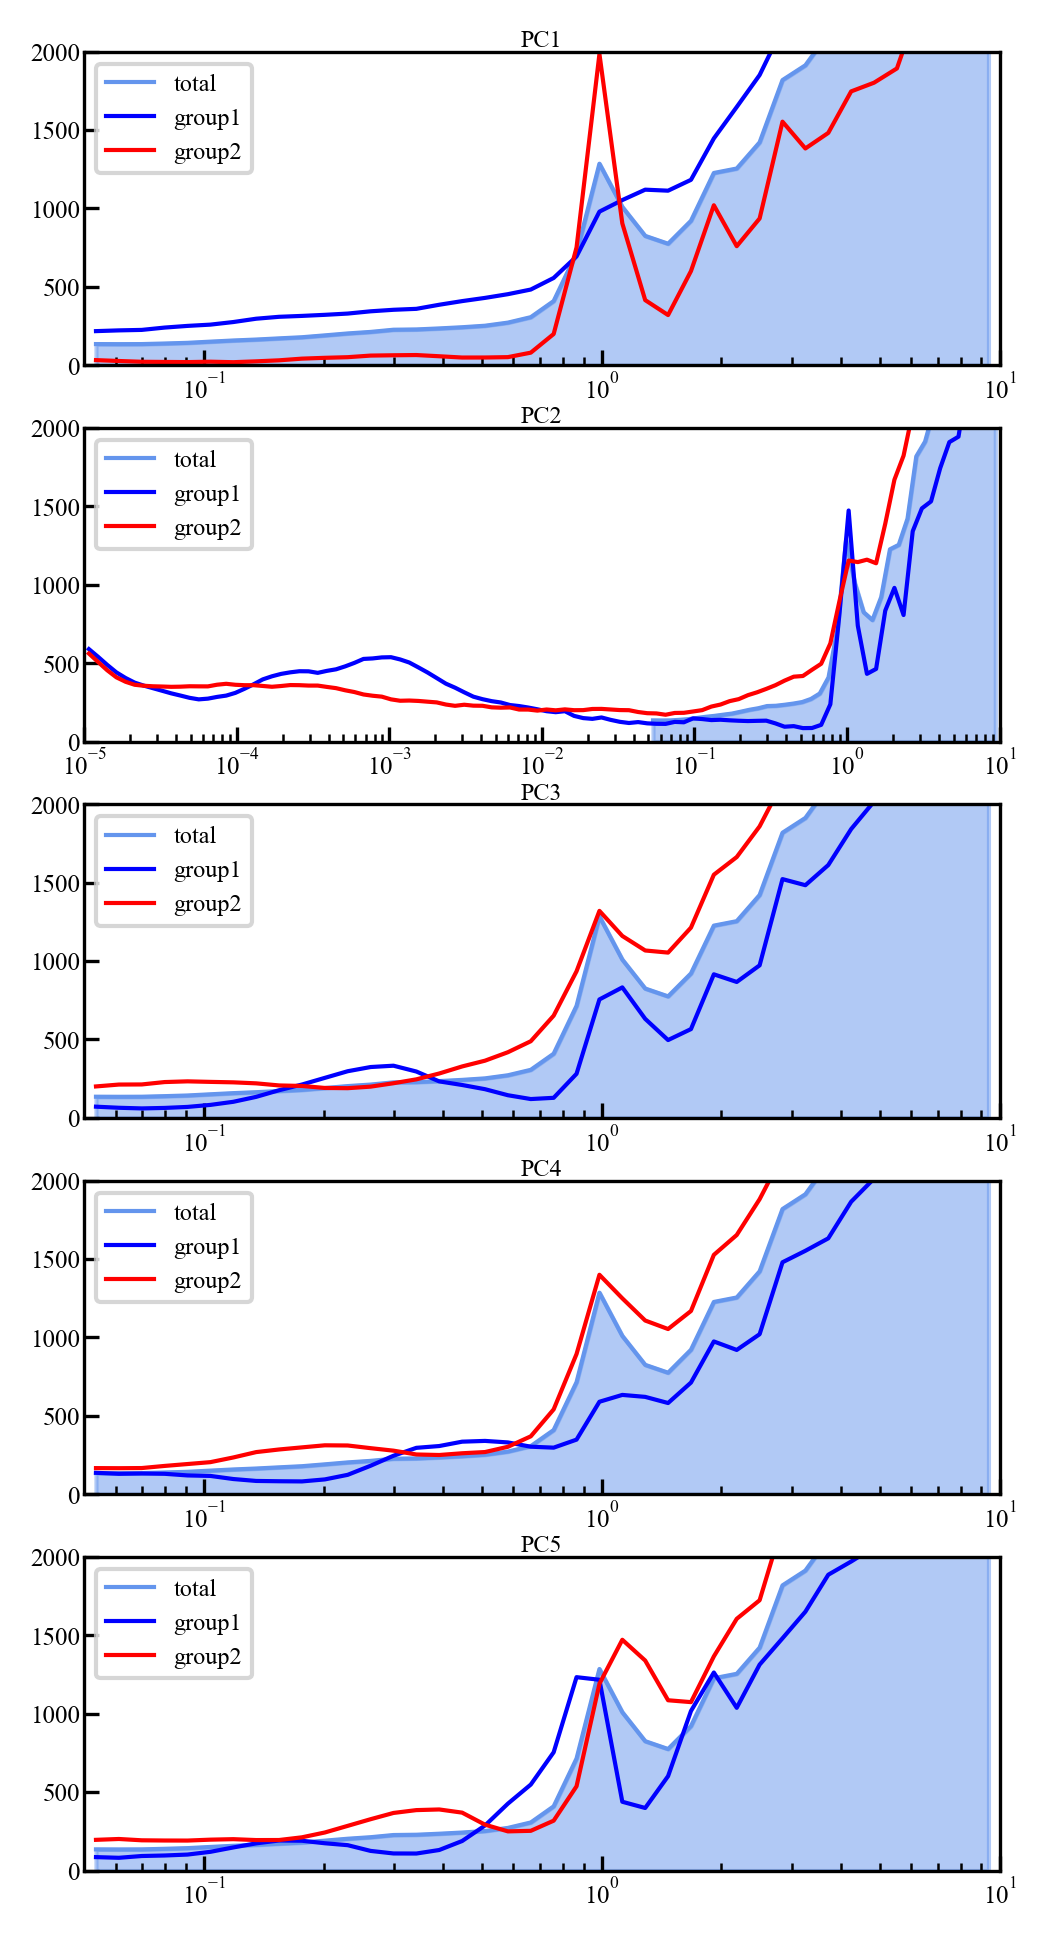

In [81]:
pc_BPY_lim_40.plot_group_histograms_1d(ylims=(0, 2000))

<AxesSubplot:>

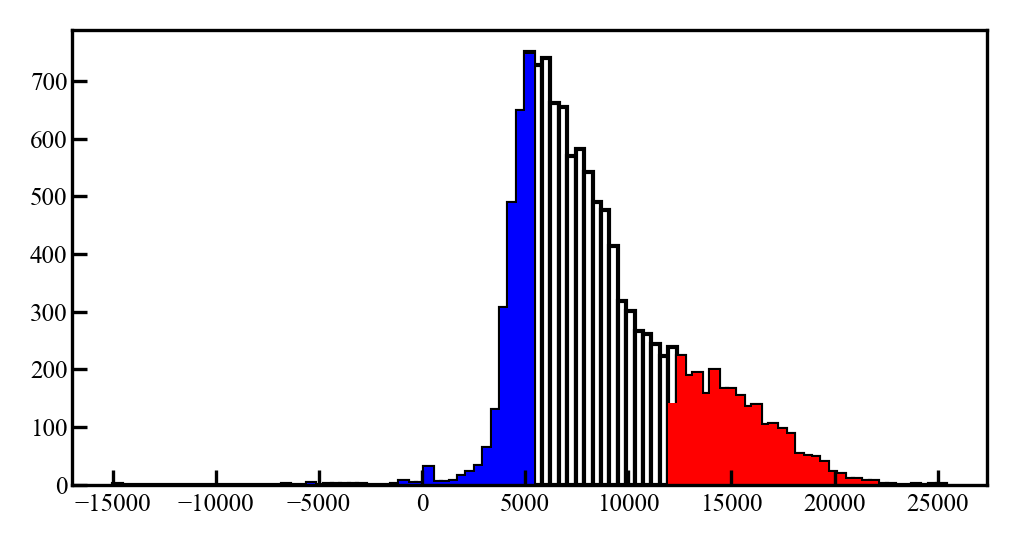

In [87]:
pc_BPY_lim_40.plot_pc_hist(pc_key='PC2', plot_groups=True, dpi=300, ax=None)

<AxesSubplot:>

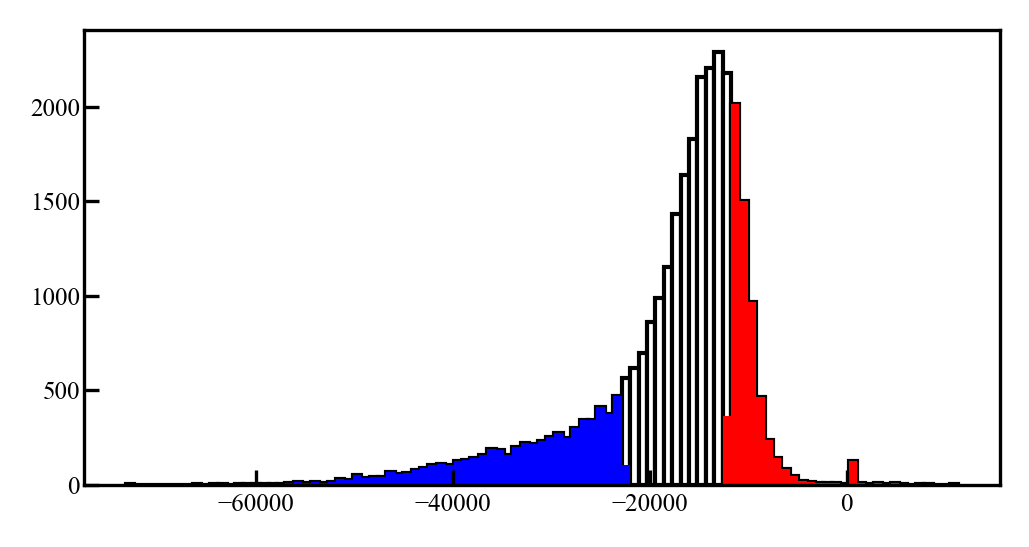

In [88]:
pc_BPY_hold_lim_40.plot_pc_hist(pc_key='PC2', plot_groups=True, dpi=300, ax=None)

In [ ]:
# noise_stats_lim_40_pc2_gr1 = NoiseStats(folder=home_folder, traces=pc_BPY_lim_40.traces_group1['PC2'], num_of_fft=6, save_data=3)

In [96]:
which_trace = np.random.choice(pc_BPY_hold_lim_40.traces_group2['PC2'])
print(which_trace)

14604


(1e-05, 0.01)

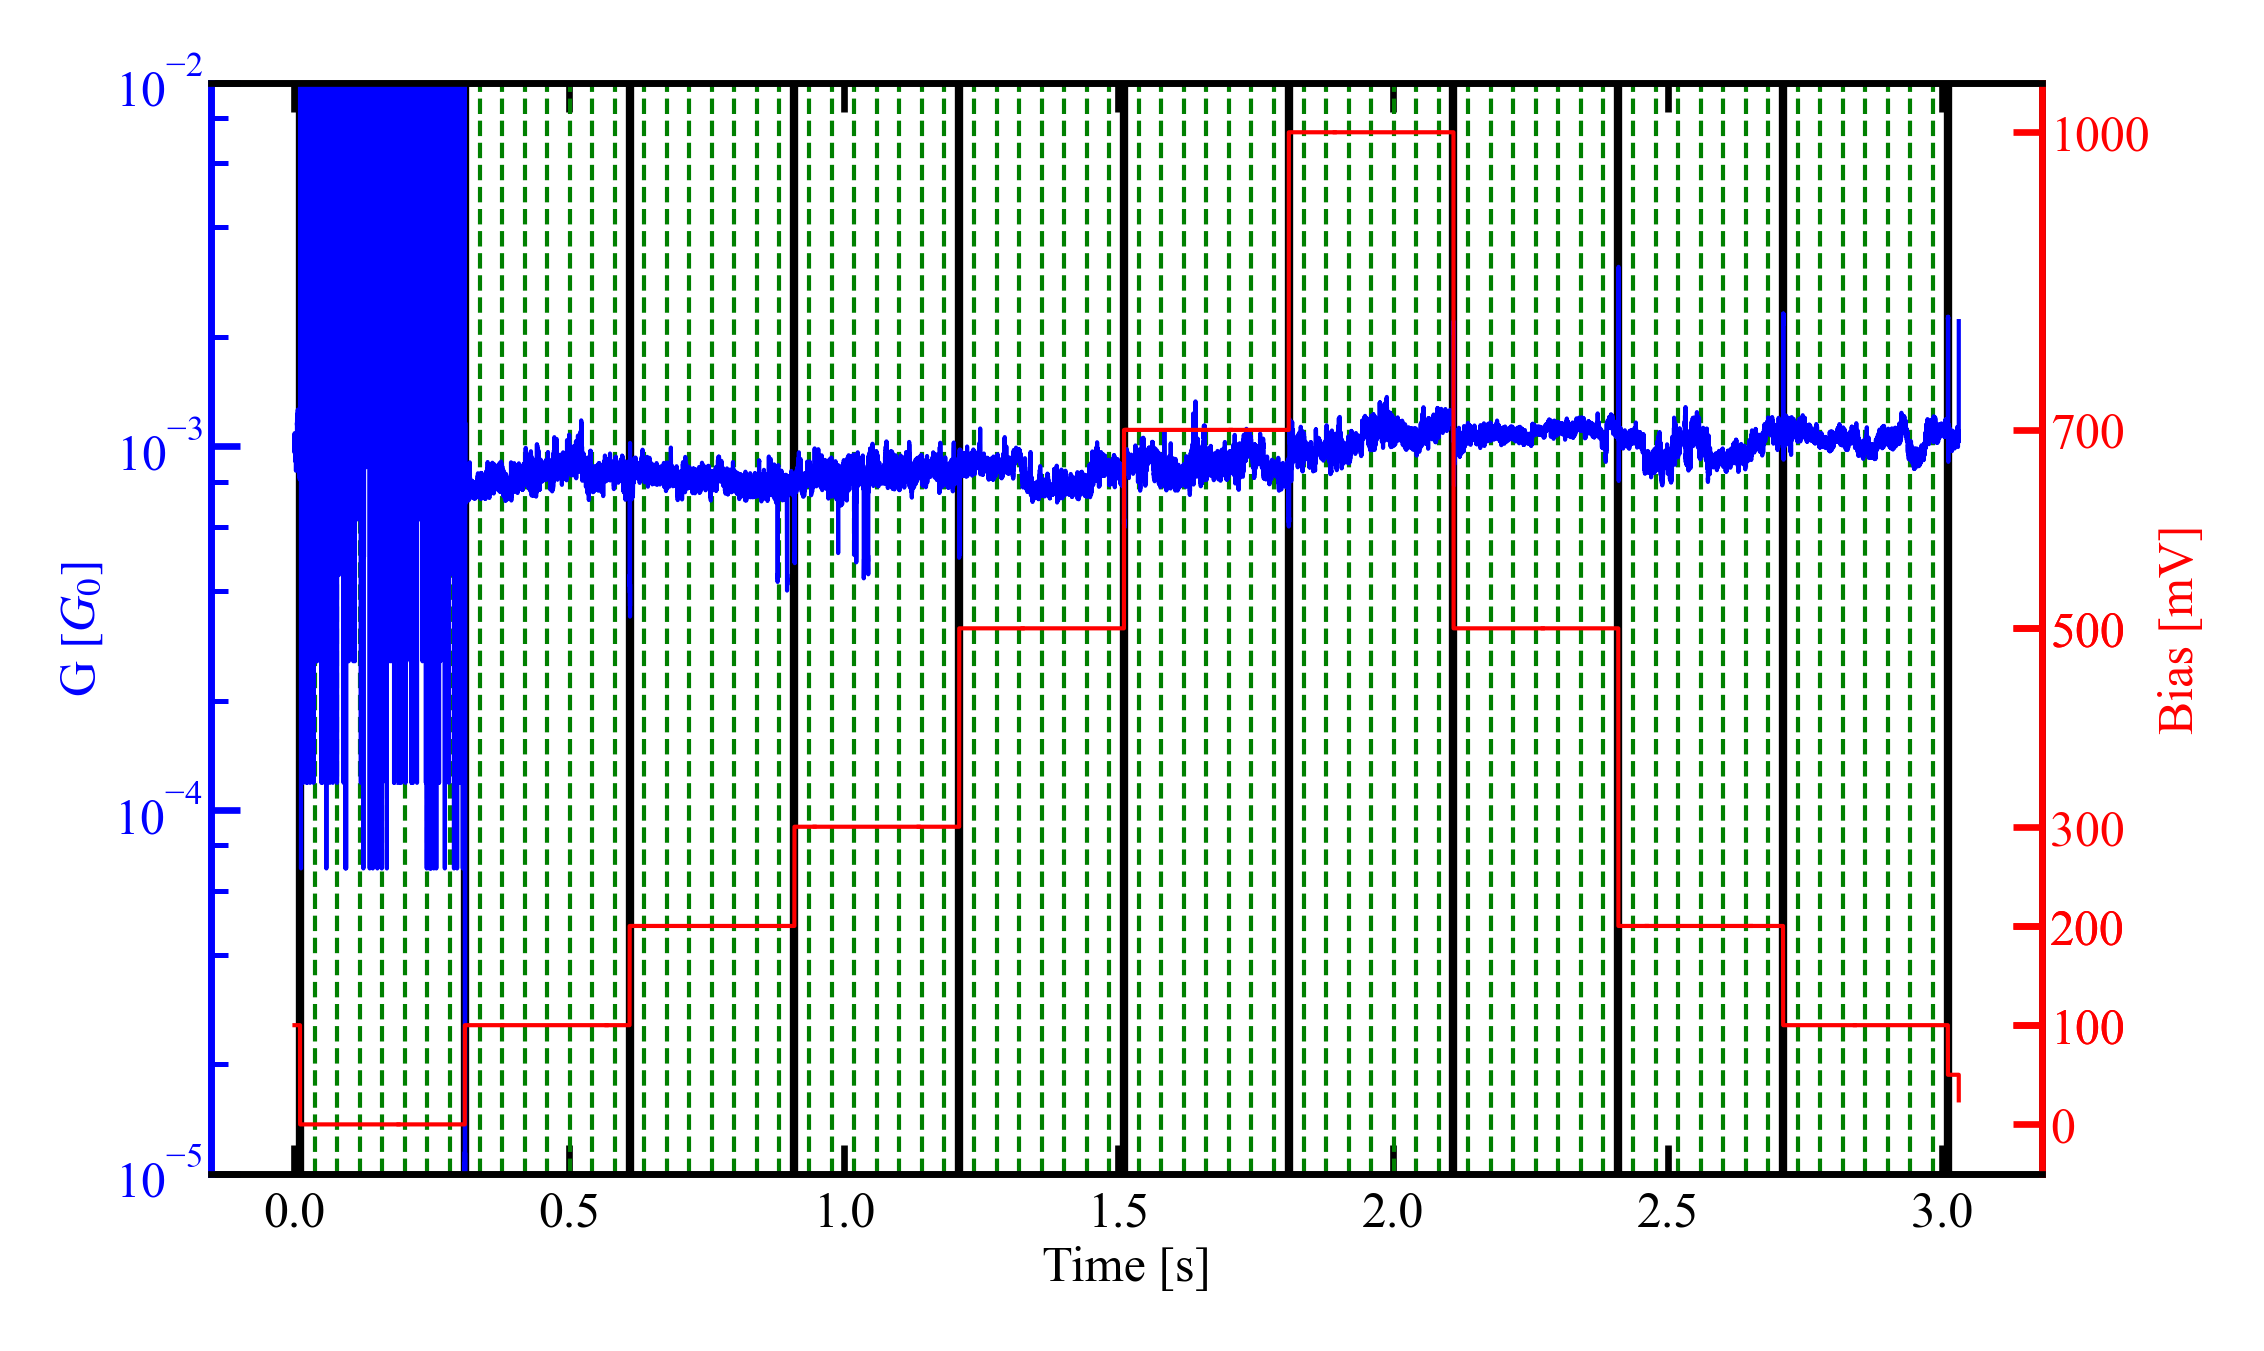

In [128]:
hold_trace = HoldTrace(which_trace, load_from=home_folder)
hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000))
ax, par = hold_trace.plot_hold_traces(conductance=True, plot_step_ranges=True, plot_psd_intervals=True)

ax.set_ylim(1e-5, 1e-2)
# ax.axhline(1e-3)
# ax.axhline(2e-3)

(1e-27, 1e-18)

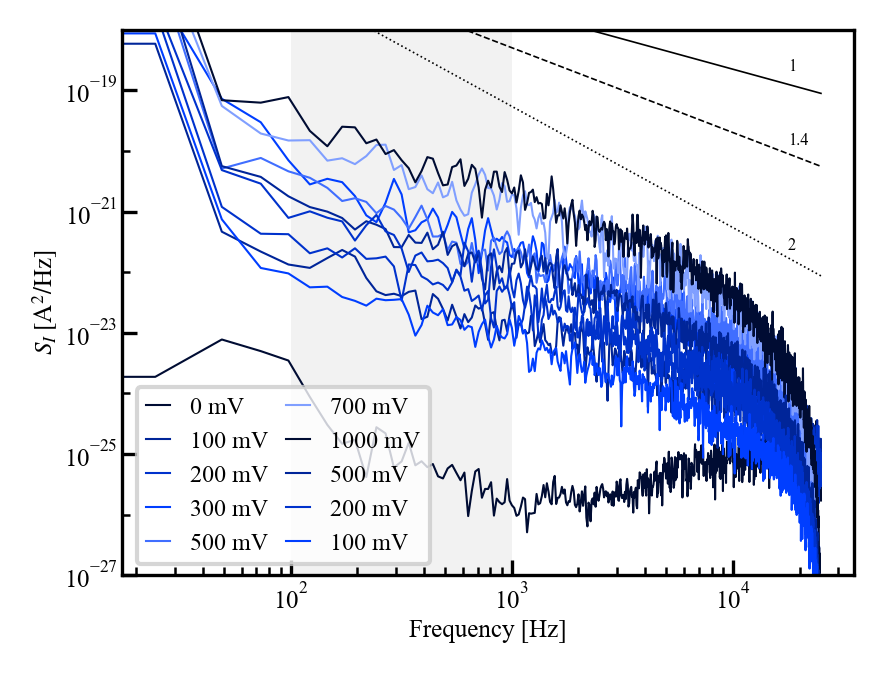

In [107]:
fig, ax = plt.subplots(figsize=(utils.cm2inch(8, 6)), dpi=300)
hold_trace.plot_psds(ax=ax)
ax.set_ylim(1e-27, 1e-18)

(0.0005, 0.005)

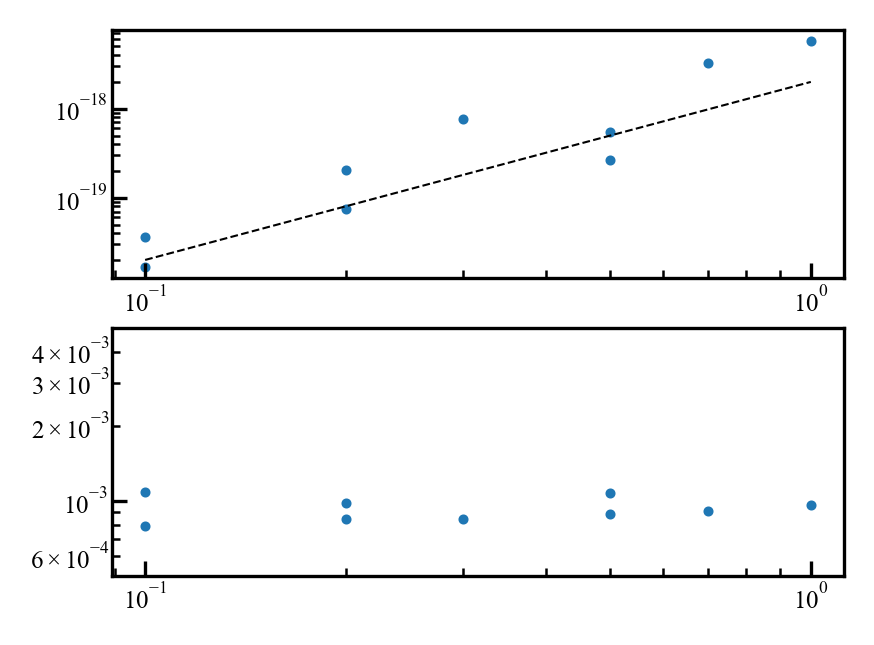

In [127]:
fig, ax = plt.subplots(2, figsize=(utils.cm2inch(8, 6)), dpi=300)
ax[0].scatter(hold_trace.bias_steps[1:], hold_trace.areas_pull[1:], s=2)
ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[0].plot(np.logspace(-1, 0, num=10, base=10), np.logspace(-1, 0, num=10, base=10)**2/5e17, ls='--', c='k', lw=0.5)

ax[1].scatter(hold_trace.bias_steps, hold_trace.avg_cond_on_step_pull, s=2)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(5e-4, 5e-3)

In [110]:
hold_trace.bias_steps

array([-1.3085937e-05,  9.9993020e-02,  1.9999912e-01,  3.0000523e-01,
        4.9998692e-01,  6.9999909e-01,  9.9998689e-01,  4.9998692e-01,
        1.9999912e-01,  9.9993020e-02], dtype=float32)